# Project CIE539

Demand analysis is an important part of transportation systems management. The aim of this project is to illustrate the demand modeling process for the commute trips in New York City. Data from the household travel survey called the Citywide Mobility Survey (CMS) will be used to assess New York City residents' travel behavior, preferences, and attitudes. 
Project should be performed individually; final report should be submitted as a pdf file of fully executed Jupyter Notebook following provided template. In addition, each student should present assigned sections in class in accordance with presentation schedule. Presentations will be held in the end of the class on the assigned day, every student will have 5 minutes to present. $Jupyter Notebook$ and Slide deck (if any) should be submitted to the UB BrightSpace the day before the presentation. 
 


# Project Description 

The aim of this project is to analyze current and future transportation demand of commute trips at New York City, understand the usage of transit and bicycle travel modes, and explore transportation barriers at New York City. Each student will develop several models that analyze and predict current and future travel demand for **commute trips** on **working days**. This process will include the following steps: explore the 2022 NYC travel data, predict future trips produced and attracted by each zone, conduct trip distribution step for predicted trips, develop a discrete choice model using the survey data for at least three pairs of origin-destination zones, and discuss results.



# Project Content

**Introduction**

* Background on Travel Demand Management and Forecasting (0.5 page)
 
    Discuss the motivations for and objectives of travel demand management and forecasting. Briefly discuss common practices used to evaluate current and predict future demand.

* Motivation for New Your City Case Study (0.3 page)

    Why New Your City is a good case study for demand forecasting? How commute trips in New Your City different from majority of the U.S.

* Short Introduction into Four Step Process (0.3-0.5 page)

    Discuss four step process, its origin, significance, required data and knowledge, briefly introduce each step.

**Part 1: Project Data**
<font color='blue'> Presentaiton day: November 25, 2025 </font>

* Data Upload
  
    Properly upload all required data sets. 

* Understanding Data on Participated Households, Persons, and Vehicles <font color='red'> 2 presenters </font>
  
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

* Understanding Trip Data <font color='red'> 2 presenters </font>
  
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

* Exploring Zones
  
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.

**Part 2: Cross-Classification to Predict Future Trips** <font color='red'> 1 presenter </font>
<font color='blue'> Presentaiton day: December 2, 2025 </font>

* Select attributes for the classification, create data set for the analysis, and identify average number of trips made by each group for 2022. Create future trip production based on assumed modifications of the future households and identify number of trips produced by each zone in the future. For trip attraction, consider the same share as in 2022, with total number of trips same as future production.
  
* Cross-Classification Results Discussion
  
    How future number of trips will change? How you CC analysis can be improved?

**Part 3: Trip Distribution**  <font color='red'> 1 presenter </font>
<font color='blue'> Presentaiton day: December 2, 2025 </font>

* Choose approach to conduct trip distribution step for the future transportation demand, prepare data for this step and implement it.
  
* Trip Distribution Results Discussion

    How future distribution is different compared to trip distribution in 2022? Provide at least 1 graph to support your discussion. 

**Part 4: Build a Mode Choice Model** <font color='red'> 2 presenters </font>
<font color='blue'> Presentaiton day: December 2, 2025 </font>

* Choose Model and Estimated Parameters 
  
    Build a discrete choice models for at least 2 OD pairs for 2022 data.

* Discuss Resulted Model Validity  
  
    Only reasonable models should be included in the report. To increase the likelihood to generate the model with a good fit, use OD-pairs with largest number of predicted trips. Discuss R-squired, intercept value, signs and significance of estimated parameters.

* Mode Choice Model Results Discussions  
  
    Discuss multiple noticeable observations based on estimated parameters: what unexpected significant factors you have found? Is there a difference in the models for different evaluated OD-pairs? 

**Part 5: Additional Topic (Select Only One)**  <font color='red'>(1 presenter per topic) </font>
<font color='blue'> Presentaiton day: December 4, 2025 </font>

1)	New Yorkers’ Commute behavior: 

    Discuss commute trip time and day distribution, used modes, commute origin and destination, choose at least 3 different person and hh characteristics and explore difference in commute behavior between participants based on those characteristics. Provide at least 3 graphs to support your discussion.

2)	New Yorkers’ Experiences of and Opinions on Walking and Transit usage: 

    Discuss the use of transit and walking by New Yorkers, including frequency, trip purpose, age distribution, etc. Provide at least 3 graphs to support your discussion.

3)	New Yorkers’ Experiences of and Opinions on Bicycle mode and Micro-Mobility: 

    Discuss the use of bicycle and other micromobility modes by New Yorkers, including frequency, age distribution, trip purpose, etc. Provide at least 3 graphs to support your discussion.

4)	The Equity of Access to Transportation across the City: 

    Explore the difference in number of trips and used modes between different demographics (male vs. female, disability status, household income). Provide at least 3 graphs to support your discussion.

**Conclusions**

    Discuss your project experience, how you have benefited from the project.







# Introduction
## Background on Travel Demand Management and Forecasting

## Motivation for New Your City Case Study

## Short Introduction into Four Step Process

# Part 1: Project Data 

In part 1, we will demonstrate comprehensive understanding of data on participated households, persons, and vehicles, including trip data.

* Data Upload
  
    Properly upload all required data sets. 

* Understanding Data on Participated Households, Persons, and Vehicles
  
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

* Understanding Trip Data
  
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

* Exploring Zones
  
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
import statsmodels.api as sm
import scipy as sp
import geopandas as gpd
from shapely import wkt

## Data Upload

In [27]:
#### Store the url string that hosts our .csv files 
#### Copy data files to the 2022CMS folder that should be in the same folder as this notebook
urlday = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Day_2022.csv"
urlhhl = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Household_2022.csv"
urlper = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Person_2022.csv"
urlzon = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Survey_Zones.csv"
urltrp = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Trip_2022.csv"
urlveh = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Vehicle_2022.csv"

#### Read the .csv file using `pandas` libriary and store it as a `pandas` Data Frame
dday = pd.read_csv(urlday)
dhhl = pd.read_csv(urlhhl)
dper = pd.read_csv(urlper)
dzon = pd.read_csv(urlzon)
dtrp = pd.read_csv(urltrp)
dveh = pd.read_csv(urlveh)

#### Finally, let's make sure that all columns are displayed
pd.set_option('display.max_columns', None)

In [28]:
dday.head(3)

,hh_id,num_trips,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,summary_complete,num_complete_trip_surveys,begin_day,end_day,telecommute_time,delivery_2,delivery_3,delivery_4,delivery_5,delivery_6,delivery_7,delivery_8,delivery_9,delivery_996,shop_online,no_travel_1,no_travel_2,no_travel_3,no_travel_4,no_travel_5,no_travel_6,no_travel_7,no_travel_8,no_travel_9,no_travel_11,no_travel_12,no_travel_13,no_travel_99,wkday_weight,svnday_weight
0,22000050,0,2200005001,1,220000500101,4,1,0,10/13/2022,1,0.0,1,997,995,0,0,0,1,0,0,0,0,0,0,995,995,995,995,995,995,995,995,995,995,995,995,995,0.0,0.000000
1,22000050,2,2200005001,1,220000500102,5,2,1,10/14/2022,1,2.0,1,1,995,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,0.0,215.724068
2,22000050,0,2200005001,1,220000500103,6,3,1,10/15/2022,1,0.0,1,1,995,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,215.724068


In [29]:
dhhl.head(3)

,hh_id,hh_cms_zone_gp,participation_group,signup_platform,diary_platform,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight
0,22000050,1,9,rmove,rmove,5,4,1,1,1,1,0,1,1,0,3,3,3,0,1,1,1,1,4,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,359.540113
1,22000105,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,1,0,0,61,3,1,2,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,4,1723.260580
2,22000128,1,9,rmove,rmove,6,4,2,1,1,0,1,1,1,1,5,5,3,2,0,1,1,1,53,4,1,4,2,36005,2,995,995,995,995,995,995,995,995,995,0,1,0,0,1,1,1,1,0,995,995,995,995,995,995,995,995,3,1,0,0,0,0,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,2,1163.731813


In [30]:
dper.head(3)

,hh_id,num_trips,num_days_complete,person_id,person_num,is_participant,phone_type,relationship,age,r_age,race_1,race_2,race_3,race_4,race_5,race_6,race_997,race_999,r_race,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_5,ethnicity_997,ethnicity_999,r_ethnicity,gender,can_drive,disability,disability_follow_1,disability_follow_2,disability_follow_3,disability_follow_4,disability_follow_5,disability_follow_6,disability_follow_996,disability_follow_999,education,employment,worker,num_jobs,job_type,industry,work_in_region,work_county,work_cms_zone,wfh_policy,commute_freq,telework_freq,r_telework_freq,work_mode,r_work_mode,work_mode_own,work_mode_auto,work_park_loc,work_park_pay,work_park_cost,work_park_amount,work_mode_taxi,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,student,r_student,school_type,r_school_type,school_in_region,school_county,school_freq,remote_class_freq,school_mode,school_mode_own,school_mode_auto,school_park_loc,school_park_cost,school_park_amount,school_mode_taxi,school_mode_bus,school_mode_rail,school_mode_ferry,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,home_park_1,home_park_2,home_park_3,home_park_pay,home_park_cost,home_park_amount,second_home,second_home_freq,second_home_in_region,second_home_county,share_1,share_2,share_3,share_4,share_5,share_6,share_996,tnc_freq,tnc_purp,carshare_freq,vehicle,bike_freq,bike_purp_1,bike_purp_2,bike_purp_3,bike_purp_4,bike_purp_5,bike_purp_6,bike_purp_997,no_bike_nyc_1,no_bike_nyc_2,no_bike_nyc_3,no_bike_nyc_4,no_bike_nyc_5,no_bike_nyc_6,no_bike_nyc_7,no_bike_nyc_9,no_bike_nyc_997,no_freq_bike_nyc_1,no_freq_bike_nyc_2,no_freq_bike_nyc_3,no_freq_bike_nyc_4,no_freq_bike_nyc_5,no_freq_bike_nyc_6,no_freq_bike_nyc_997,no_freq_bike_nyc_other,bike_stolen,citi_bike_freq,citi_bike_type,citi_bike_pay,citi_bike_alt_mode,no_bike_share_1,no_bike_share_2,no_bike_share_3,no_bike_share_4,no_bike_share_5,no_bike_share_6,no_bike_share_7,no_bike_share_8,no_bike_share_997,micromobility_devices_204,micromobility_devices_83,micromobility_devices_205,micromobility_devices_73,micromobility_devices_206,micromobility_devices_207,micromobility_devices_996,kid_accompany,kid_mode,r_kid_mode,kid_mode_own,kid_mode_auto,kid_mode_taxi,kid_mode_bus,kid_mode_rail,kid_mode_ferry,kid_access,kid_egress,kid_mode_bike,kid_mode_scooter,harassment,harassment_change_1,harassment_change_2,harassment_change_3,harassment_change_4,harassment_change_5,harassment_change_6,harassment_change_7,harassment_change_8,harassment_change_9,harassment_change_10,harassment_change_996,harassment_change_997,person_weight
0,22000050,4,5,2200005001,1,1,995,0,6,3,0,0,0,0,0,0,1,0,6,0,0,1,0,1,0,0,7,2,3,0,995,995,995,995,995,995,995,995,5,6,0,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,3,2,997,7,1,36061.0,995,6,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,995,995,NaN,0,995,0,NaN,1,0,0,0,0,0,0,6,995,995,995,3,1,0,1,0,0,0,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,1,995,995,995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,1,0,0,0,1,0,0,0,0,0,0,1078.620338
1,22000105,61,7,2200010501,1,1,995,0,8,3,0,0,0,0,0,0,1,0,6,0,0,1,0,0,0,0,3,2,1,0,995,995,995,995,995,995,995,995,3,1,1,1,1,8,1,36061.0,3,1,1,995,996,102,102,995,995,995,995,995,NaN,995,23,995,995,995,995,995,995,2,3,995,995,995,NaN,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,995,995,NaN,0,995,0,NaN,0,0,0,0,0,0,1,995,995,995,995,996,995,995,995,995,995,995,995,0,0,0,0,0,0,0,0,1,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,0,0,0,0,0,1,995,995,995,995,995,995,995,995,995,995,995,995,995,4,995,995,995,995,995,995,995,995,995,995,995,995,3446.521161
2,22000128,53,6,2200012801,1,1,995,0,6,3,0,0,0,0,0,0,0,1,999,0,0,0,0,1,0,0,5,1,1,0,995,995,995,995,995,995,995,995

In [31]:
dzon.head(3)

,Shape,CMS Zone
0,MULTIPOLYGON (((-73.82656709083903 40.77065046...,Middle Queens
1,MULTIPOLYGON (((-74.00869559889541 40.68619331...,Inner Brooklyn
2,MULTIPOLYGON (((-73.78833338088718 40.83466780...,Northern Bronx


In [32]:
dtrp.head(3)

,hh_id,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,linked_trip_id,linked_leg_num,trip_id,trip_num,day_is_complete,arrive_dow,depart_dow,o_in_region,o_county,d_in_region,d_county,mode_type_nyc,r_mode_type_nyc,mode_1,mode_2,mode_3,mode_priority_nyc,transit_access,r_transit_access,transit_egress,r_transit_egress,park_location,park_type,park_pay,park_cost,ev_charge_station,ev_charge_station_level_1,ev_charge_station_level_2,ev_charge_station_level_3,ev_charge_station_level_4,ev_charge_station_level_5,ev_charge_station_level_997,ev_charge_station_level_998,tnc_type,taxi_type,taxi_pay,taxi_cost,transit_type,bike_park_loc,scooter_park_location,num_travelers,num_hh_travelers,num_non_hh_travelers,hh_member_1,hh_member_2,hh_member_3,hh_member_4,hh_member_5,hh_member_6,hh_member_7,hh_member_8,hh_member_9,hh_member_10,hh_member_11,hh_member_12,driver,o_purpose,o_purpose_category,d_purpose,d_purpose_category,d_purpose_category_linked,r_d_purpose_category_linked,work_trip,depart_date,depart_hour,depart_minute,depart_seconds,r_timeofday,arrive_date,arrive_hour,arrive_minute,arrive_second,duration_minutes,r_duration_minutes,duration_seconds,distance_miles,r_distance_miles,dwell_mins,high_speed_flag,long_distance_flag,o_cms_zone,d_cms_zone,unlinked_trip,o_location_type,d_location_type,trip_wkday_weight,trip_svnday_weight
0,22000050,2200005001,1,220000500102,5,2,1,10/14/2022,2200005001001,1,2200005001001,1,1,5,5,1,36005,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,1,1,37,10,10,7,0,10/14/2022,13,46,20,2,10/14/2022,14,0,55,15,2,875,0.570632,1,0.000000,0,0,2,3,0,1,4,0.000000,215.724068
1,22000050,2200005001,1,220000500102,5,2,1,10/14/2022,2200005001002,1,2200005001002,2,1,5,5,1,36061,1,36005,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,37,10,1,1,1,1,0,10/14/2022,14,0,55,2,10/14/2022,17,12,43,192,4,11508,0.453004,1,5856.666667,0,0,3,2,0,4,1,0.000000,215.724068
2,22000050,2200005001,1,220000500106,2,6,1,10/18/2022,2200005001003,1,2200005001003,3,1,2,2,1,36005,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,1,1,32,7,7,7,0,10/18/2022,18,49,23,4,10/18/2022,19,7,5,18,2,1062,0.736290,1,14.716667,0,0,2,3,0,1,4,359.540113,215.724068


In [33]:
dveh.head(3)

,hh_id,vehicle_id,vehicle_num,year,fuel_type,hh_weight
0,22000050,2200005001,1,1998,1,359.540113
1,22000128,2200012801,1,2022,1,1163.731813
2,22000430,2200043001,1,2017,1,203.870573


## Undersytanding Data On Participated Households, Persons, and Vehicles
    Provide socio-demographic statistics of participated households, include at least 3 graphs, compare participant demographics with general population using publicly available data.

In [34]:
for i in range(len(dhhl.columns)):
    print(dhhl.columns[i])

hh_id
hh_cms_zone_gp
participation_group
signup_platform
diary_platform
num_days_complete
num_days_complete_weekday
num_days_complete_weekend
num_complete_mon
num_complete_tue
num_complete_wed
num_complete_thu
num_complete_fri
num_complete_sat
num_complete_sun
num_people
r_num_people
num_adults
num_kids
num_students
num_workers
num_vehicles
r_num_vehicles
num_trips
income_broad
primary_language
residence_type
residence_rent_own
home_county
vehicle_change
reduced_veh_1
reduced_veh_2
reduced_veh_3
reduced_veh_4
reduced_veh_5
reduced_veh_6
reduced_veh_7
reduced_veh_8
reduced_veh_997
increased_veh_1
increased_veh_2
increased_veh_3
increased_veh_4
increased_veh_5
increased_veh_6
increased_veh_7
increased_veh_8
increased_veh_997
ev_typical_charge_1
ev_typical_charge_2
ev_typical_charge_3
ev_typical_charge_4
ev_typical_charge_5
ev_typical_charge_6
ev_typical_charge_7
ev_typical_charge_997
ev_purchase
ev_purchase_barriers_1
ev_purchase_barriers_2
ev_purchase_barriers_3
ev_purchase_barriers_4
e

In [35]:
dhhl = dhhl[(dhhl['income_broad'] != 995) & (dhhl['income_broad'] != 999)]
dhhl.head(10)

,hh_id,hh_cms_zone_gp,participation_group,signup_platform,diary_platform,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight
0,22000050,1,9,rmove,rmove,5,4,1,1,1,1,0,1,1,0,3,3,3,0,1,1,1,1,4,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,359.540113
1,22000105,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,1,0,0,61,3,1,2,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,4,1723.260580
2,22000128,1,9,rmove,rmove,6,4,2,1,1,0,1,1,1,1,5,5,3,2,0,1,1,1,53,4,1,4,2,36005,2,995,995,995,995,995,995,995,995,995,0,1,0,0,1,1,1,1,0,995,995,995,995,995,995,995,995,3,1,0,0,0,0,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,2,1163.731813
3,22000430,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,30,3,1,4,2,36005,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,997,203.870573
4,22000460,1,9,rmove,rmove,5,4,1,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0,9,3,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,0,995,995,995,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,177.370464
5,22000533,1,9,rmove,rmove,7,5,2,1,1,1,1,1,1,1,2,2,2,0,0,2,0,0,41,2,1,4,2,36005,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,1,0,0,3,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,995,995,995,995,995,995,995,995,2,959.715717
6,22000607,1,3,browser,rmove,7,5,2,1,1,1,1,1,1,1,3,3,2,1,0

In [36]:
def income_level(x):
    if x in [1,2]:
        return "Low-Income"
    elif x in [3,4]:
        return "Middle-Income"
    else:
        return "High-Income"

dhhl['income_level'] = dhhl['income_broad'].apply(income_level)
dhhl_income = dhhl.groupby('income_level').size()
print(f"income distribution:\n{dhhl_income}")

income distribution:
income_level
High-Income      1060
Low-Income        784
Middle-Income     797
dtype: int64


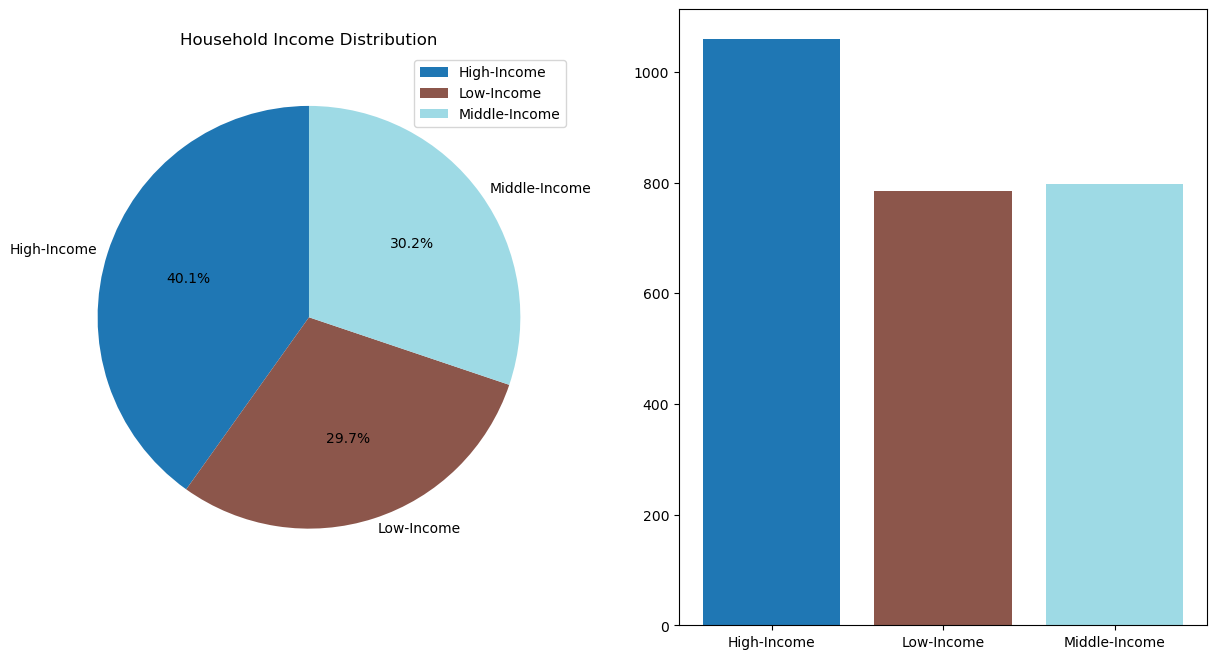

In [37]:
labels = dhhl_income.index
sizes = dhhl_income.values

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(sizes)))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.6, labeldistance=1.05, colors=colors)


plt.title('Household Income Distribution')
plt.legend(loc='best')


plt.subplot(1,2,2)
plt.bar(x=labels, height=sizes, color=colors)
plt.show()


In [38]:
dhhl=dhhl[dhhl['primary_language'].isin([1,2,3,4])]


language = {1:'English',
            2:'Spanish',
            3:'Chinese',
            4:'Russian'}

dhhl['language'] = dhhl['primary_language'].map(language)
dhhl_language = dhhl.groupby('language').size()

print(f'Primary language distribution:\n{dhhl_language}')


Primary language distribution:
language
Chinese     120
English    2194
Russian      30
Spanish     171
dtype: int64


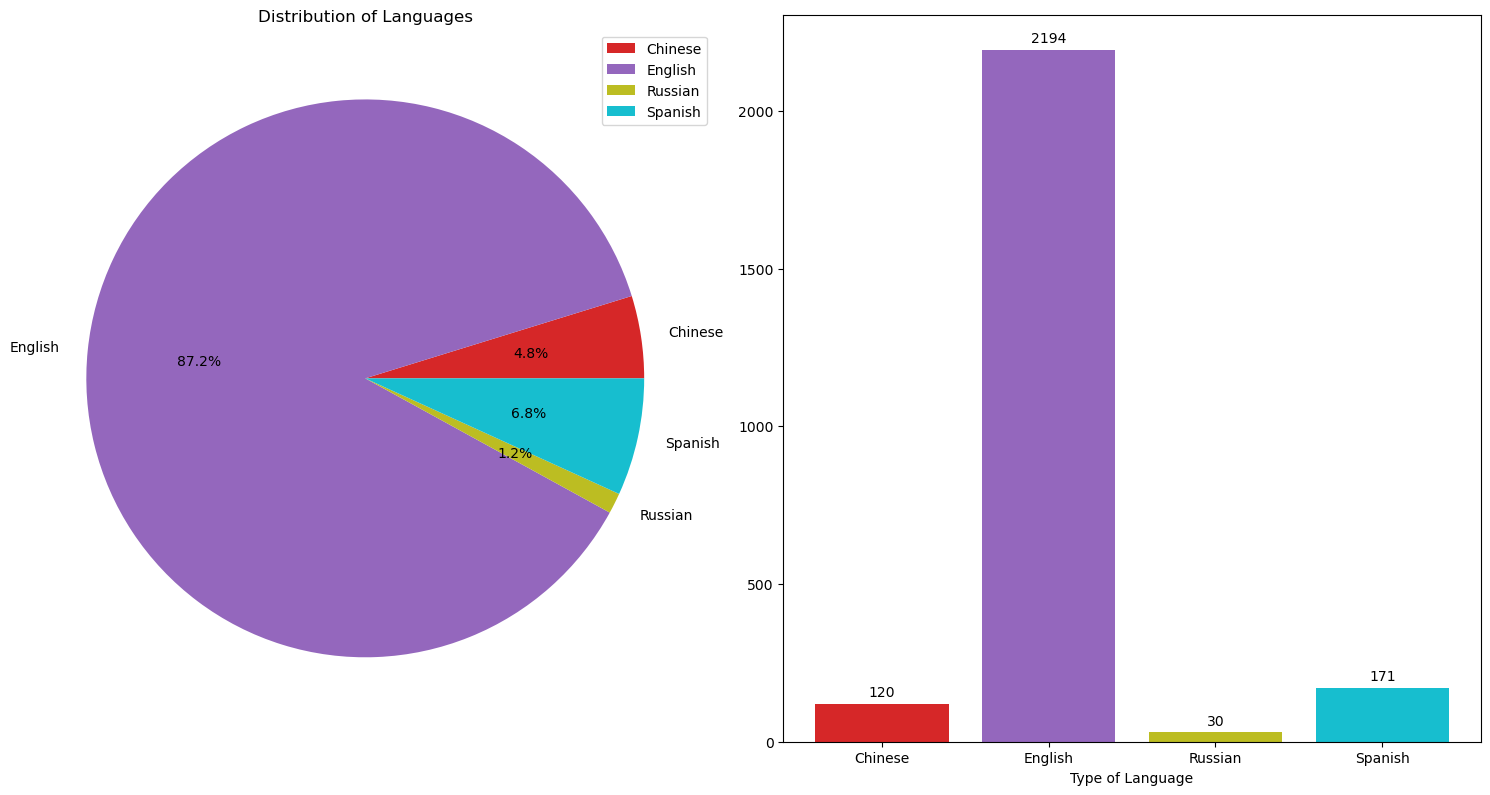

In [39]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
pie = plt.pie(dhhl_language.values,labels=dhhl_language.index,autopct='%1.1f%%',colors=['#d62728', '#9467bd','#bcbd22', '#17becf'])
plt.title('Distribution of Languages')
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(1,2,2)
bars = plt.bar(dhhl_language.index, dhhl_language.values, color=['#d62728', '#9467bd','#bcbd22', '#17becf'])
plt.bar_label(bars, label_type='edge', padding=3)
plt.xlabel('Type of Language')
plt.tight_layout()
plt.show()


In [40]:
dhhl = dhhl[dhhl['num_vehicles'] != '995']
dhhl_numvehicles = dhhl.groupby('num_vehicles').size()

print(f"The distribution of number of vehicles in households:\n{dhhl_numvehicles}")

The distribution of number of vehicles in households:
num_vehicles
0    1272
1     922
2     261
3      46
4       7
5       5
6       1
8       1
dtype: int64


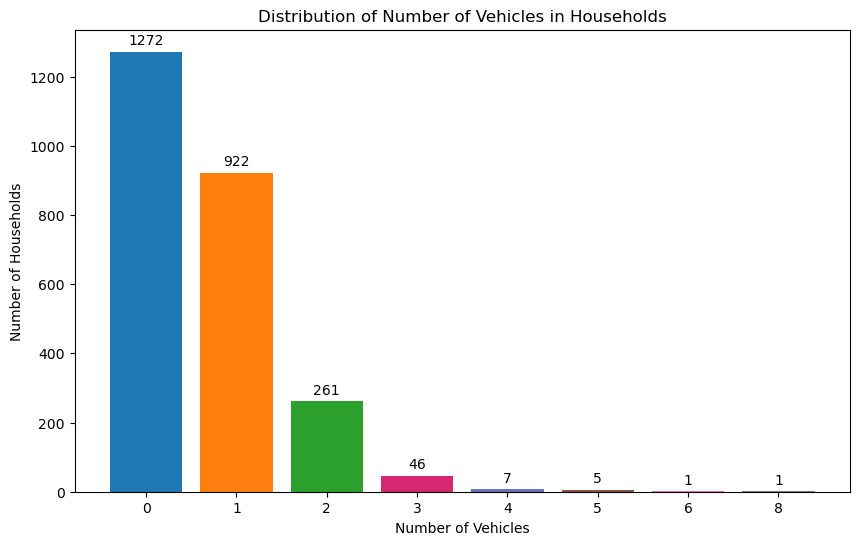

In [41]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', "#d62770", "#6774bd", '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', "#17cf45"]


x_positions = range(len(dhhl_numvehicles))

plt.figure(figsize=(10,6))
bar2 = plt.bar(x_positions, dhhl_numvehicles.values, color=colors[:len(dhhl_numvehicles)])
plt.bar_label(bar2, padding=3)

plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Households')
plt.title('Distribution of Number of Vehicles in Households')
plt.xticks(x_positions, dhhl_numvehicles.index)

plt.show()


In [42]:
dhhl = dhhl[~dhhl['num_people'].isin(['995'])]
dhhl_numpeople = dhhl.groupby('num_people').size()

print(f"The distribution of number of people in households:\n{dhhl_numpeople}")

The distribution of number of people in households:
num_people
1    808
2    850
3    406
4    284
5    102
6     47
7     11
8      5
9      2
dtype: int64


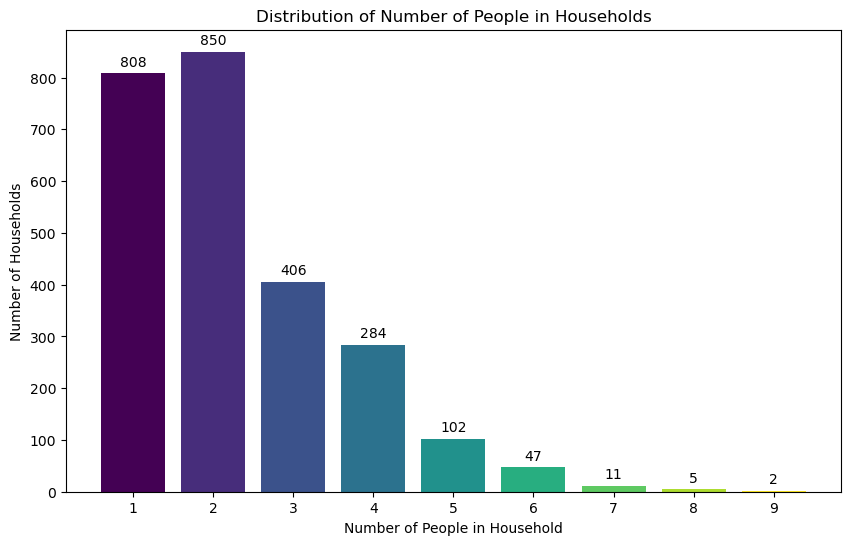

In [ ]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(dhhl_numpeople)))

plt.figure(figsize=(10,6))
bar1 = plt.bar(dhhl_numpeople.index, dhhl_numpeople.values, color=colors)
plt.bar_label(bar1, padding=3)
plt.xlabel('Number of People in Household')
plt.ylabel('Number of Households')
plt.title('Distribution of Number of People in Households')
plt.xticks(dhhl_numpeople.index)
plt.show()

### Discussion

`In terms of household income, 36% of households were sorted into the lower-income group. For middle and higher income, the numbers are 24% and 41%. Compared to the official data, our data demonstrates the same proportions. For each type of household income, the numbers are 29.7%, 30.2%, and 40.1%.`

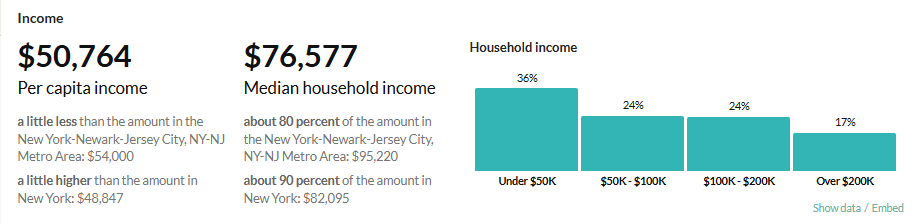

\* The picture form the <url> https://censusreporter.org/profiles/16000US3651000-new-york-ny/

## Understanding Trip Data
    Discuss number of trips recorded, used modes, trip purpose, etc., include at least 3 graphs.

In [44]:
for i in range(len(dtrp.columns)):
    print(dtrp.columns[i])

hh_id
person_id
person_num
day_id
travel_dow
day_num
is_complete
travel_date
linked_trip_id
linked_leg_num
trip_id
trip_num
day_is_complete
arrive_dow
depart_dow
o_in_region
o_county
d_in_region
d_county
mode_type_nyc
r_mode_type_nyc
mode_1
mode_2
mode_3
mode_priority_nyc
transit_access
r_transit_access
transit_egress
r_transit_egress
park_location
park_type
park_pay
park_cost
ev_charge_station
ev_charge_station_level_1
ev_charge_station_level_2
ev_charge_station_level_3
ev_charge_station_level_4
ev_charge_station_level_5
ev_charge_station_level_997
ev_charge_station_level_998
tnc_type
taxi_type
taxi_pay
taxi_cost
transit_type
bike_park_loc
scooter_park_location
num_travelers
num_hh_travelers
num_non_hh_travelers
hh_member_1
hh_member_2
hh_member_3
hh_member_4
hh_member_5
hh_member_6
hh_member_7
hh_member_8
hh_member_9
hh_member_10
hh_member_11
hh_member_12
driver
o_purpose
o_purpose_category
d_purpose
d_purpose_category
d_purpose_category_linked
r_d_purpose_category_linked
work_trip
d

In [45]:
# Total number of trips
dtrp.shape[0]

86339

In [46]:
dtrp = dtrp[dtrp['r_mode_type_nyc'] != 995]


trip_mode_type = {1:'Vehicle',
                  2:'Bus',
                  3:'Rail',
                  4:'Walk',
                  5:'Bike',
                  6:'Other'}

dtrp['mode_type'] = dtrp['r_mode_type_nyc'].map(trip_mode_type)



trip_mode = dtrp.groupby('mode_type').size()

print(f"The trip mode counts are:\n{trip_mode}")

The trip mode counts are:
mode_type
Bike        1958
Bus         4456
Other       1102
Rail       15944
Vehicle    23014
Walk       36992
dtype: int64


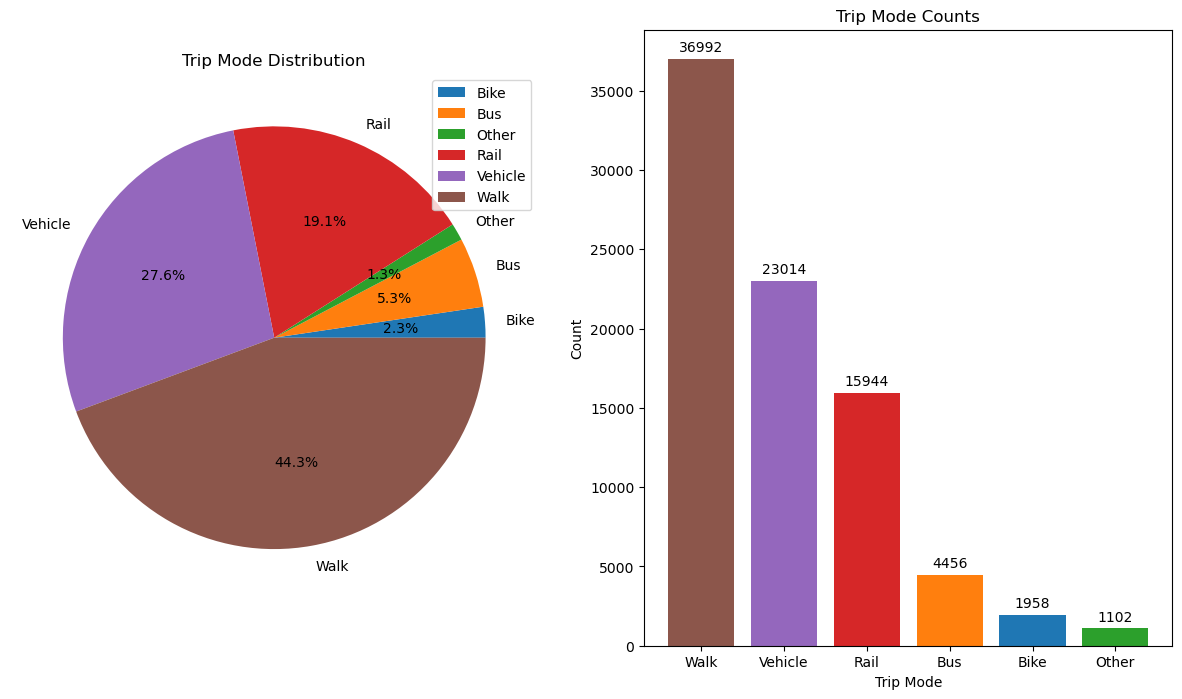

In [47]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.pie(trip_mode.values, labels=trip_mode.index, colors=colors,autopct='%1.1f%%')
plt.title('Trip Mode Distribution')
plt.legend()

plt.subplot(1,2,2)
order = trip_mode.sort_values(ascending=False).index
trip_mode_sorted = trip_mode.loc[order]
colors_sorted = [colors[trip_mode.index.get_loc(i)] for i in order]

bar3 = plt.bar(order, trip_mode_sorted, color=colors_sorted)
plt.bar_label(bar3,padding=3)
plt.title('Trip Mode Counts')
plt.xlabel('Trip Mode')
plt.ylabel('Count')
plt.show()

In [48]:
dtrp = dtrp[(dtrp['d_purpose_category'] != -1) & (dtrp['d_purpose_category'] != 99)]

trip_purpose_type = {1:'Home',
                     2:'Work',
                     3:'Work related',
                     4:'School',
                     5:'School related',
                     6:'Escort',
                     7:'Shopping',
                     8:'Meal',
                     9:'Social/Recreation',
                     10:'Errand',
                     11:'Change mode',
                     12:'Overnight',
                     13:'Other'}

dtrp['purpose_type'] = dtrp['d_purpose_category'].map(trip_purpose_type)

trip_purpose = dtrp.groupby('purpose_type').size()

trip_purpose

purpose_type
Change mode          26672
Errand                3309
Escort                4290
Home                 16553
Meal                  6311
Other                  442
Overnight             2661
School                 329
School related         392
Shopping              6507
Social/Recreation     7525
Work                  3866
Work related          4562
dtype: int64

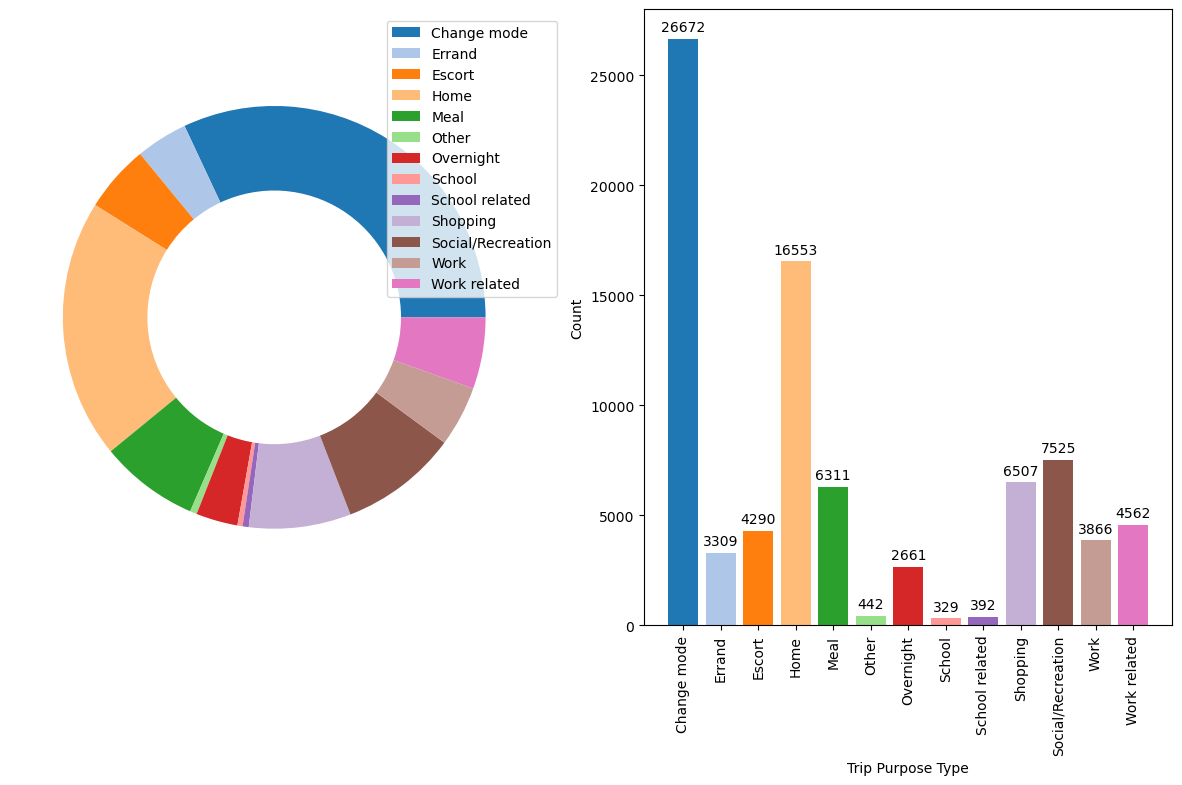

In [49]:
cmap = plt.get_cmap('tab20')
colors = cmap.colors

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.pie(trip_purpose.values, colors=colors, wedgeprops={'width': 0.4})
plt.legend(trip_purpose.index, loc='center left',bbox_to_anchor=(0.7, 0.8))

plt.subplot(1, 2, 2)
bar3 = plt.bar(trip_purpose.index, trip_purpose.values, color=colors)
plt.bar_label(bar3,padding=3)
plt.xlabel('Trip Purpose Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
day_name = {1: 'Monday', 
            2: 'Tuesday', 
            3: 'Wednesday', 
            4: 'Thursday',
            5: 'Friday', 
            6: 'Saturday', 
            7: 'Sunday'}

dtrp['trip_day'] = dtrp['day_num'].map(day_name)

trip_day = dtrp.groupby('trip_day').size()

print(f"The distribution of trips by day is:\n{trip_day}")


The distribution of trips by day is:
trip_day
Friday       10653
Monday       15740
Saturday     11222
Sunday       11115
Thursday     10954
Tuesday      12050
Wednesday    11685
dtype: int64


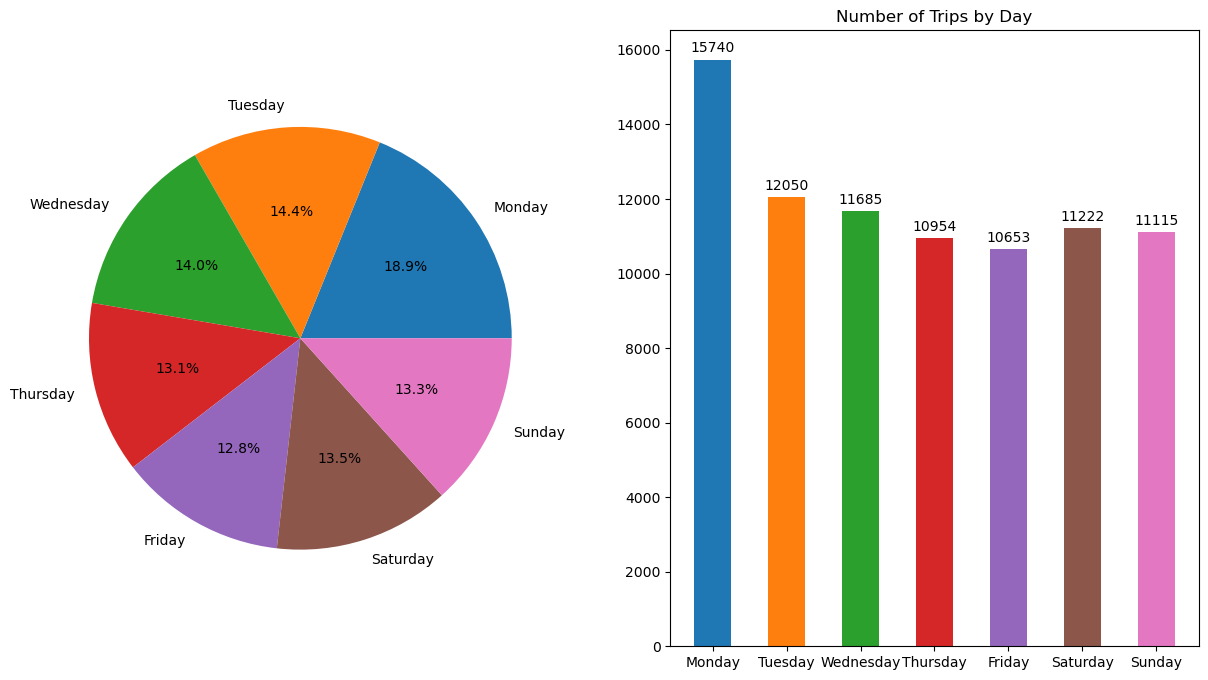

In [ ]:
cmap = plt.get_cmap('tab10')
color = cmap.colors

day_order = [day_name[i] for i in day_name]
sorted_trip_day = trip_day.reindex(day_order)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.pie(sorted_trip_day.values, labels = sorted_trip_day.index, colors=color,autopct = '%1.1f%%')

plt.subplot(122)
bar4 = plt.bar(sorted_trip_day.index, sorted_trip_day.values, color=color,width=0.5)
plt.bar_label(bar4,padding=3)
plt.title('Number of Trips by Day')
plt.show()

### Discussion

`1. The total number of trips recoded is 86339.`

`2. In terms of travel mode, walking is the most common choice, accounting for 44.3% of all trips. By contrast, only 2.3% of people travel by bike, and just 1.3% use other modes.`

`3. For travel purpose, change mode accouts for the most portion of all trip purposes, following by the trips for home. Conversely, school and school-related trips represent the smallest share.`

## Exploring Zones
    Discuss NYC zones, number of trips each zone generated (attracted and produced), share of trips, area of each zone. Include at least one supporting graph, consider adding picture presenting map with zones.

In [ ]:
dzon.head(15)

,Shape,CMS Zone
0,MULTIPOLYGON (((-73.82656709083903 40.77065046...,Middle Queens
1,MULTIPOLYGON (((-74.00869559889541 40.68619331...,Inner Brooklyn
2,MULTIPOLYGON (((-73.78833338088718 40.83466780...,Northern Bronx
3,MULTIPOLYGON (((-73.86925732173215 40.58191015...,Outer Brooklyn
4,MULTIPOLYGON (((-73.86978222880252 40.78534684...,LGA
5,MULTIPOLYGON (((-73.96067204645479 40.74405121...,Inner Queens
6,MULTIPOLYGON (((-73.74706587407947 40.63717004...,JFK
7,MULTIPOLYGON (((-73.7664825742497 40.614080973...,Outer Queens
8,MULTIPOLYGON (((-73.91443837702195 40.79566608...,Upper Manhattan
9,MULTIPOLYGON (((-73.88858567810188 40.79870666...,Southern Bronx


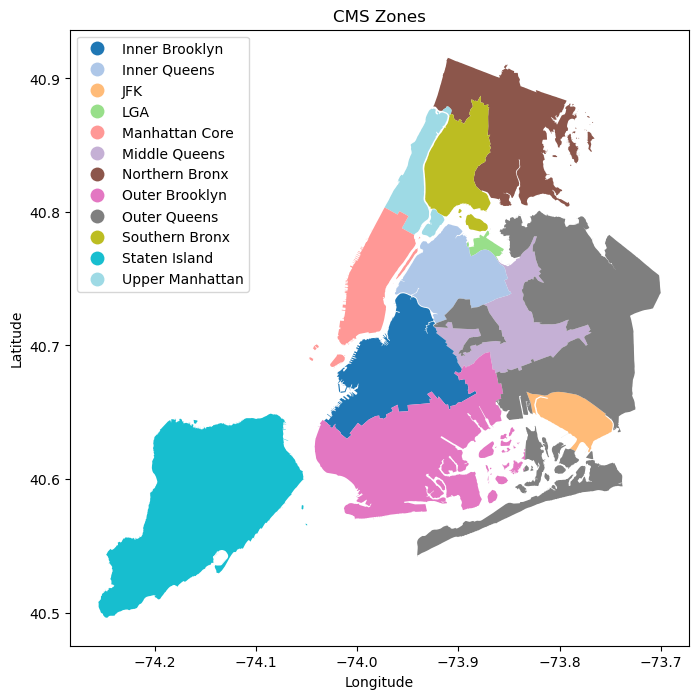

In [ ]:
dzon["geometry"] = dzon["Shape"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(dzon, geometry="geometry", crs="EPSG:4326")

cmap = plt.get_cmap('tab20')

ax = gdf.plot(column="CMS Zone", cmap=cmap, legend=True, legend_kwds={'loc': 'upper left'}, figsize=(8, 8))

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("CMS Zones")
plt.show()

In [ ]:
zone_nums = list(range(12))
zone_names = {k: v for k, v in enumerate(dzon['CMS Zone'])}

dtrp['o_cms_zone_name'] = dtrp['o_cms_zone'].map(zone_names)
dtrp['d_cms_zone_name'] = dtrp['d_cms_zone'].map(zone_names)

tripzone_d = dtrp.groupby('d_cms_zone_name').size()
tripzone_o = dtrp.groupby('o_cms_zone_name').size()

all_zones = set(zone_names.values())
o_zones_with_data = set(tripzone_o.index)
d_zones_with_data = set(tripzone_d.index)

missing_origins = all_zones - o_zones_with_data
missing_destinations = all_zones - d_zones_with_data

print("Origin zones with no trips:", missing_origins)
print("Destination zones with no trips:", missing_destinations)

tripzone_o = tripzone_o.reindex(all_zones, fill_value=0)
tripzone_d = tripzone_d.reindex(all_zones, fill_value=0)

tripzone = pd.crosstab(dtrp['o_cms_zone_name'], dtrp['d_cms_zone_name'])
tripzone = tripzone.reindex(index=all_zones, columns=all_zones, fill_value=0)

print(f"Number of trips from each origin zone:\n{tripzone_o}\n")
print(f"Number of trips to each destination zone:\n{tripzone_d}\n")

Origin zones with no trips: {'Middle Queens'}
Destination zones with no trips: {'Middle Queens'}
Number of trips from each origin zone:
o_cms_zone_name
Inner Brooklyn      4902
Southern Bronx      4986
Outer Brooklyn      7160
Inner Queens        7074
Northern Bronx      6567
Staten Island       7575
Outer Queens        4626
Upper Manhattan    11038
Manhattan Core      4721
Middle Queens          0
JFK                 4681
LGA                20089
dtype: int64

Number of trips to each destination zone:
d_cms_zone_name
Inner Brooklyn      4912
Southern Bronx      4940
Outer Brooklyn      7096
Inner Queens        7075
Northern Bronx      6525
Staten Island       7671
Outer Queens        4606
Upper Manhattan    10999
Manhattan Core      4707
Middle Queens          0
JFK                 4658
LGA                20230
dtype: int64



number of trips each zone generated (attracted and produced):


d_cms_zone_name,Inner Brooklyn,Southern Bronx,Outer Brooklyn,Inner Queens,Northern Bronx,Staten Island,Outer Queens,Upper Manhattan,Manhattan Core,Middle Queens,JFK,LGA
o_cms_zone_name,,,,,,,,,,,,
Inner Brooklyn,3508,2,230,15,487,345,30,33,2,0,14,236
Southern Bronx,1,3704,14,30,19,108,76,664,87,0,38,245
Outer Brooklyn,229,6,4782,84,327,250,15,69,2,0,17,1379
Inner Queens,14,25,69,5106,41,188,213,206,23,0,336,853
Northern Bronx,484,13,347,49,4971,190,26,53,3,0,15,416
Staten Island,342,110,250,176,176,5115,353,289,141,0,203,420
Outer Queens,28,71,23,224,29,358,3082,94,8,0,599,110
Upper Manhattan,30,667,68,215,52,286,96,8233,48,0,148,1195
Manhattan Core,0,81,2,20,2,155,7,53,4208,0,2,191


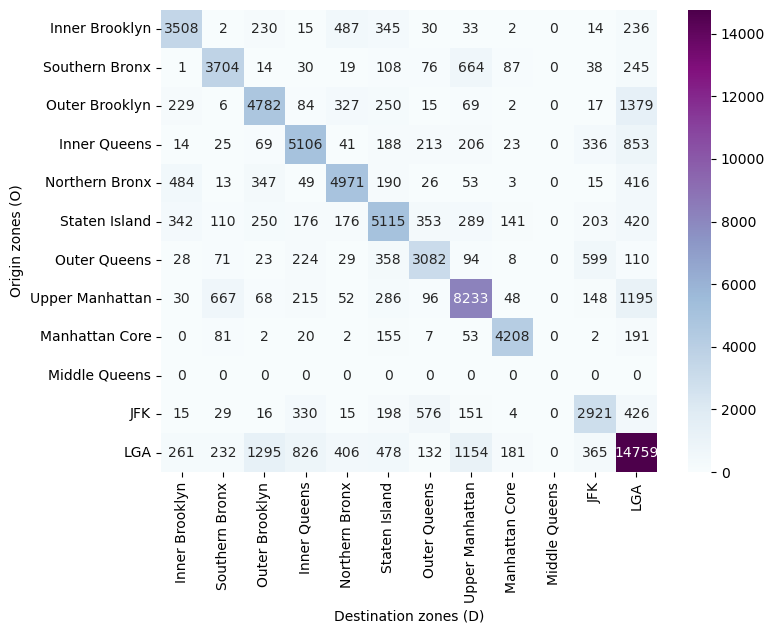

In [ ]:
print(f"number of trips each zone generated (attracted and produced):")
display(tripzone)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(tripzone, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('Destination zones (D)')
plt.ylabel('Origin zones (O)')
plt.show()

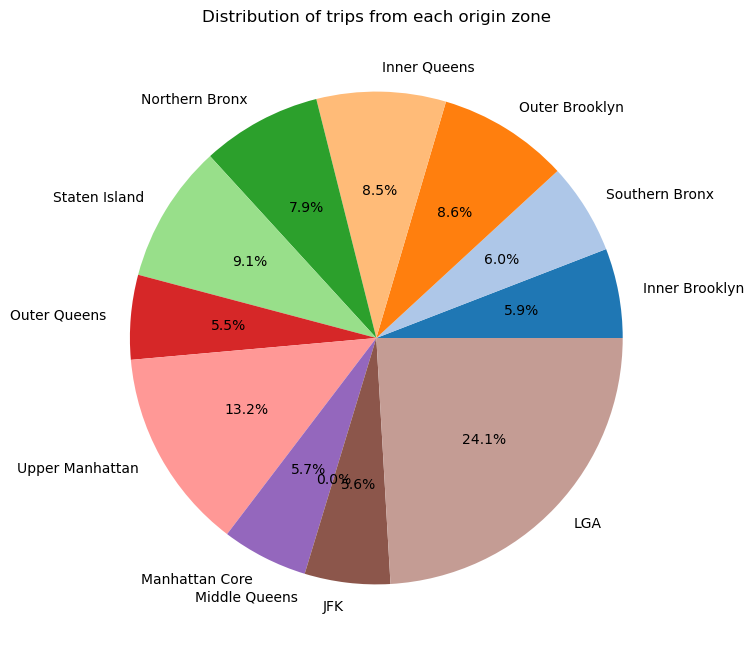

In [ ]:
cmap = plt.get_cmap("tab20")   

plt.figure(figsize=(10, 8))
plt.pie(tripzone_o, labels=tripzone_o.index, autopct="%1.1f%%", colors=cmap.colors)
plt.title("Distribution of trips from each origin zone")
plt.show()

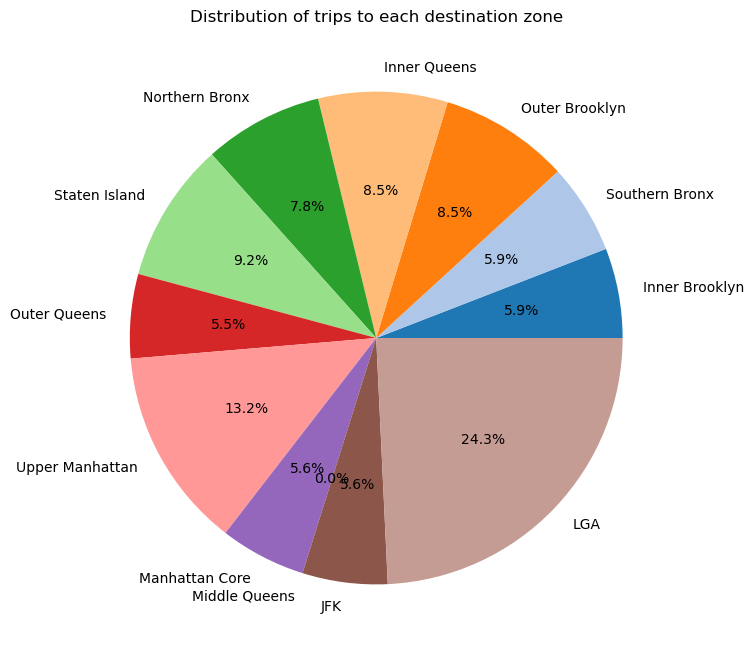

In [ ]:
cmap = plt.get_cmap("tab20")   

plt.figure(figsize=(10, 8))
plt.pie(tripzone_d, labels=tripzone_d.index, autopct="%1.1f%%", colors=cmap.colors)
plt.title("Distribution of trips to each destination zone")
plt.show()

### Discussion

`The LGA zone accounts for the most trip generations and trip destinations, reaching 24.1% and 24.3% of all trip generations and destinations, respectively. In contrast, the lowest zone is Outer Queens, accounting for 5.5% of both, respectively. Middle Queens missed the travel data, accouting for 0%.`



# Part 2: Cross-Classification to Predict Future Trips
    Select attributes for the classification, create data set for the analysis, and identify average number of trips made by each group for 2022. Create future trip production based on assumed modifications of the future households and identify number of trips produced by each zone in the future. For trip attraction, consider the same share as in 2022, with total number of trips same as future production.

In [ ]:
dtrp.head()

,hh_id,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,linked_trip_id,linked_leg_num,trip_id,trip_num,day_is_complete,arrive_dow,depart_dow,o_in_region,o_county,d_in_region,d_county,mode_type_nyc,r_mode_type_nyc,mode_1,mode_2,mode_3,mode_priority_nyc,transit_access,r_transit_access,transit_egress,r_transit_egress,park_location,park_type,park_pay,park_cost,ev_charge_station,ev_charge_station_level_1,ev_charge_station_level_2,ev_charge_station_level_3,ev_charge_station_level_4,ev_charge_station_level_5,ev_charge_station_level_997,ev_charge_station_level_998,tnc_type,taxi_type,taxi_pay,taxi_cost,transit_type,bike_park_loc,scooter_park_location,num_travelers,num_hh_travelers,num_non_hh_travelers,hh_member_1,hh_member_2,hh_member_3,hh_member_4,hh_member_5,hh_member_6,hh_member_7,hh_member_8,hh_member_9,hh_member_10,hh_member_11,hh_member_12,driver,o_purpose,o_purpose_category,d_purpose,d_purpose_category,d_purpose_category_linked,r_d_purpose_category_linked,work_trip,depart_date,depart_hour,depart_minute,depart_seconds,r_timeofday,arrive_date,arrive_hour,arrive_minute,arrive_second,duration_minutes,r_duration_minutes,duration_seconds,distance_miles,r_distance_miles,dwell_mins,high_speed_flag,long_distance_flag,o_cms_zone,d_cms_zone,unlinked_trip,o_location_type,d_location_type,trip_wkday_weight,trip_svnday_weight
0,22000050,2200005001,1,220000500102,5,2,1,10/14/2022,2200005001001,1,2200005001001,1,1,5,5,1,36005,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,1,1,37,10,10,7,0,10/14/2022,13,46,20,2,10/14/2022,14,0,55,15,2,875,0.570632,1,0.000000,0,0,2,3,0,1,4,0.000000,215.724068
1,22000050,2200005001,1,220000500102,5,2,1,10/14/2022,2200005001002,1,2200005001002,2,1,5,5,1,36061,1,36005,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,37,10,1,1,1,1,0,10/14/2022,14,0,55,2,10/14/2022,17,12,43,192,4,11508,0.453004,1,5856.666667,0,0,3,2,0,4,1,0.000000,215.724068
2,22000050,2200005001,1,220000500106,2,6,1,10/18/2022,2200005001003,1,2200005001003,3,1,2,2,1,36005,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,1,1,32,7,7,7,0,10/18/2022,18,49,23,4,10/18/2022,19,7,5,18,2,1062,0.736290,1,14.716667,0,0,2,3,0,1,4,359.540113,215.724068
3,22000050,2200005001,1,220000500106,2,6,1,10/18/2022,2200005001004,1,2200005001004,4,1,2,2,1,36061,1,36005,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,0,995,995,995,995,995,995,995,995,995,995,32,7,1,1,1,1,0,10/18/2022,19,21,48,4,10/18/2022,19,48,16,26,3,1588,0.274326,1,431.733333,0,0,3,2,0,4,1,359.540113,215.724068
4,22000105,2200010501,1,220001050101,1,1,1,10/17/2022,2200010501001,1,2200010501001,1,1,1,1,1,36061,1,36061,9,4,1,995,995,1,995,995,995,995,995,995,995,NaN,995,995,995,995,995,995,995,995,995,995,995,NaN,995,995,995,1,1,0,1,0,995,995,995,995,995,995,995,995,995,995,2,10,2,10,2,2,2,1,10/17/2022,12,4,58,2,10/17/2022,13,1,40,57,3,3402,0.485176,1,127.200000,0,0,3,3,0,2,2,861.630290,492.360166


In [ ]:
dtrp.describe()

,hh_id,person_id,person_num,day_id,travel_dow,day_num,is_complete,linked_trip_id,linked_leg_num,trip_id,trip_num,day_is_complete,arrive_dow,depart_dow,o_in_region,o_county,d_in_region,d_county,mode_type_nyc,r_mode_type_nyc,mode_1,mode_2,mode_3,mode_priority_nyc,transit_access,r_transit_access,transit_egress,r_transit_egress,park_location,park_type,park_pay,park_cost,ev_charge_station,ev_charge_station_level_1,ev_charge_station_level_2,ev_charge_station_level_3,ev_charge_station_level_4,ev_charge_station_level_5,ev_charge_station_level_997,ev_charge_station_level_998,tnc_type,taxi_type,taxi_pay,taxi_cost,transit_type,bike_park_loc,scooter_park_location,num_travelers,num_hh_travelers,num_non_hh_travelers,hh_member_1,hh_member_2,hh_member_3,hh_member_4,hh_member_5,hh_member_6,hh_member_7,hh_member_8,hh_member_9,hh_member_10,hh_member_11,hh_member_12,driver,o_purpose,o_purpose_category,d_purpose,d_purpose_category,d_purpose_category_linked,r_d_purpose_category_linked,work_trip,depart_hour,depart_minute,depart_seconds,r_timeofday,arrive_hour,arrive_minute,arrive_second,duration_minutes,r_duration_minutes,duration_seconds,distance_miles,r_distance_miles,dwell_mins,high_speed_flag,long_distance_flag,o_cms_zone,d_cms_zone,unlinked_trip,o_location_type,d_location_type,trip_wkday_weight,trip_svnday_weight
count,8.633900e+04,8.633900e+04,86339.0,8.633900e+04,86339.000000,86339.000000,86339.000000,8.633900e+04,86339.000000,8.633900e+04,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,773.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,1080.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.0,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,79530.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000,86339.000000
mean,2.208826e+07,2.208826e+09,1.0,2.208826e+11,3.918171,3.814418,79.356583,2.208826e+12,1.575244,2.208826e+12,24.292463,0.864522,3.924600,3.923094,0.908662,34663.830934,0.907585,34637.843674,40.323863,35.936981,180.474930,853.498326,962.727470,47.517182,621.673369,617.540382,621.709691,617.545130,741.818413,823.867140,980.940062,19.097439,990.021636,993.813572,993.813086,993.812993,993.813005,993.813005,993.813028,993.813468,981.199690,976.011559,980.576518,26.037963,622.751190,970.456711,992.663107,34.643278,1.251914,33.447828,1.0,290.424547,617.005224,787.263241,913.395777,961.847937,986.208399,991.255157,993.225460,994.654328,994.654490,994.654328,772.657374,48.148091,14.898516,40.214689,7.049920,5.115707,4.990421,0.082489,13.600574,28.918982,27.686109,2.712065,13.829787,29.143122,27.756970,22.764938,80.217051,1366.057494,5.629963,80.326932,204.952810,0.061780,0.006278,5.752777,5.754607,0.343993,45.587568,45.647969,371.951353,363.117997
std,4.300051e+04,4.300051e+06,0.0,4.300051e+08,1.893058,2.056645,267.920020,4.300051e+09,1.065246,4.300051e+09,19.020701,0.342235,1.899515,1.898656,0.288090,6847.211263,0.289612,6908.147006,177.129693,177.940436,366.420033,343.481505,172.930809,177.551653,481.163165,482.438761,481.187789,482.432682,432.353545,375.210293,117.343407,70.483180,70.128409,34.329669,34.343742,34.346422,34.346087,34.346087,34.345417,34.332685,116.252332,135.997115,118.857385,27.783111,477.598773,153.960352,48.020724,178.402252,0.612638,178.623669,0.0,452.20

In [ ]:
dhhl.describe()

,hh_id,hh_cms_zone_gp,participation_group,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight
count,2.966000e+03,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.00000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.00000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,2.208855e+07,5.337492,6.248146,4.696898,3.447741,1.249157,0.638908,0.718139,0.728928,0.729265,0.632502,0.620364,0.628793,2.321645,2.280512,1.911666,0.409980,0.196561,1.305125,0.678018,0.667566,26.813891,112.787930,46.501349,19.718476,57.109238,36054.366150,535.335469,961.804788,961.799056,961.79973,961.788941,961.788604,961.791639,961.789278,961.790290,961.794336,941.671949,941.671274,941.662846,941.665880,941.670600,941.685772,941.674309,941.672960,941.665880,988.630479,988.626433,988.626433,988.626770,988.627107,988.626096,988.626433,988.627444,546.806811,792.788604,792.797707,792.755900,792.766689,792.797370,10.149359,598.179703,597.837829,597.819960,12.136210,926.907620,926.912003,926.920094,926.901888,926.900202,926.910654,926.904585,926.920094,926.912003,903.775455,903.757586,903.758597,903.769724,903.756912,903.765341,903.780850,903.797370,903.764329,903.76298,598.026635,597.945044,597.830074,597.809508,597.842212,597.833109,597.807485,597.806136,597.817937,951.759946,966.846932,966.826028,966.820971,966.820971,966.820634,966.8206

In [ ]:
# Merge household, trips and vehicle data
dht = pd.merge(dhhl, dtrp, on = 'hh_id', how = 'outer')
dhtv = pd.merge(dht, dveh, on = 'hh_id', how = 'outer')


In [ ]:
dhtv.describe(include='all')

,hh_id,hh_cms_zone_gp,participation_group,signup_platform,diary_platform,num_days_complete,num_days_complete_weekday,num_days_complete_weekend,num_complete_mon,num_complete_tue,num_complete_wed,num_complete_thu,num_complete_fri,num_complete_sat,num_complete_sun,num_people,r_num_people,num_adults,num_kids,num_students,num_workers,num_vehicles,r_num_vehicles,num_trips,income_broad,primary_language,residence_type,residence_rent_own,home_county,vehicle_change,reduced_veh_1,reduced_veh_2,reduced_veh_3,reduced_veh_4,reduced_veh_5,reduced_veh_6,reduced_veh_7,reduced_veh_8,reduced_veh_997,increased_veh_1,increased_veh_2,increased_veh_3,increased_veh_4,increased_veh_5,increased_veh_6,increased_veh_7,increased_veh_8,increased_veh_997,ev_typical_charge_1,ev_typical_charge_2,ev_typical_charge_3,ev_typical_charge_4,ev_typical_charge_5,ev_typical_charge_6,ev_typical_charge_7,ev_typical_charge_997,ev_purchase,ev_purchase_barriers_1,ev_purchase_barriers_2,ev_purchase_barriers_3,ev_purchase_barriers_4,ev_purchase_barriers_5,num_bicycles,bicycle_type_1,bicycle_type_2,bicycle_type_997,bike_change,reduced_bike_1,reduced_bike_2,reduced_bike_3,reduced_bike_4,reduced_bike_5,reduced_bike_6,reduced_bike_7,reduced_bike_8,reduced_bike_997,increased_bike_1,increased_bike_2,increased_bike_3,increased_bike_4,increased_bike_5,increased_bike_6,increased_bike_7,increased_bike_8,increased_bike_9,increased_bike_997,bike_store_1,bike_store_2,bike_store_3,bike_store_4,bike_store_5,bike_store_6,bike_store_8,bike_store_9,bike_store_997,num_scooters,scooter_typical_charge_1,scooter_typical_charge_2,scooter_typical_charge_4,scooter_typical_charge_5,scooter_typical_charge_6,scooter_typical_charge_7,scooter_typical_charge_997,packages,hh_weight_x,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,linked_trip_id,linked_leg_num,trip_id,trip_num,day_is_complete,arrive_dow,depart_dow,o_in_region,o_county,d_in_region,d_county,mode_type_nyc,r_mode_type_nyc,mode_1,mode_2,mode_3,mode_priority_nyc,transit_access,r_transit_access,transit_egress,r_transit_egress,park_location,park_type,park_pay,park_cost,ev_charge_station,ev_charge_station_level_1,ev_charge_station_level_2,ev_charge_station_level_3,ev_charge_station_level_4,ev_charge_station_level_5,ev_charge_station_level_997,ev_charge_station_level_998,tnc_type,taxi_type,taxi_pay,taxi_cost,transit_type,bike_park_loc,scooter_park_location,num_travelers,num_hh_travelers,num_non_hh_travelers,hh_member_1,hh_member_2,hh_member_3,hh_member_4,hh_member_5,hh_member_6,hh_member_7,hh_member_8,hh_member_9,hh_member_10,hh_member_11,hh_member_12,driver,o_purpose,o_purpose_category,d_purpose,d_purpose_category,d_purpose_category_linked,r_d_purpose_category_linked,work_trip,depart_date,depart_hour,depart_minute,depart_seconds,r_timeofday,arrive_date,arrive_hour,arrive_minute,arrive_second,duration_minutes,r_duration_minutes,duration_seconds,distance_miles,r_distance_miles,dwell_mins,high_speed_flag,long_distance_flag,o_cms_zone,d_cms_zone,unlinked_trip,o_location_type,d_location_type,trip_wkday_weight,trip_svnday_weight,vehicle_id,vehicle_num,year,fuel_type,hh_weight_y
count,1.017000e+05,101700.000000,101700.000000,101700,101700,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.00000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.00000

In [ ]:
for i in range(len(dhtv.columns)):
    print(dhtv.columns[i])

hh_id
hh_cms_zone_gp
participation_group
signup_platform
diary_platform
num_days_complete
num_days_complete_weekday
num_days_complete_weekend
num_complete_mon
num_complete_tue
num_complete_wed
num_complete_thu
num_complete_fri
num_complete_sat
num_complete_sun
num_people
r_num_people
num_adults
num_kids
num_students
num_workers
num_vehicles
r_num_vehicles
num_trips
income_broad
primary_language
residence_type
residence_rent_own
home_county
vehicle_change
reduced_veh_1
reduced_veh_2
reduced_veh_3
reduced_veh_4
reduced_veh_5
reduced_veh_6
reduced_veh_7
reduced_veh_8
reduced_veh_997
increased_veh_1
increased_veh_2
increased_veh_3
increased_veh_4
increased_veh_5
increased_veh_6
increased_veh_7
increased_veh_8
increased_veh_997
ev_typical_charge_1
ev_typical_charge_2
ev_typical_charge_3
ev_typical_charge_4
ev_typical_charge_5
ev_typical_charge_6
ev_typical_charge_7
ev_typical_charge_997
ev_purchase
ev_purchase_barriers_1
ev_purchase_barriers_2
ev_purchase_barriers_3
ev_purchase_barriers_4
e

## Choose attributs for trip classification

For the purpose of this part, let's consider:
- Income    `income_broad`
- Vehicle number within household `vehicle_num`
- Number of adults in household (age 18 and above) `num_adults`


In [ ]:
dhtv = dhtv[(dhtv['income_broad'] != 999) & (dhtv['income_broad'] != 995) & (dhtv['vehicle_num'] != 995)]

array_income = dhtv['income_broad'].unique()
array_vehicle = dhtv['vehicle_num'].dropna().unique()
array_num_adults = dhtv['num_adults'].unique()

print(array_income,array_num_adults,array_vehicle)

[3 4 2 5 1 6 7 8] [3 2 1 5 4 7 6 8] [1. 2. 3. 4. 5. 6. 7. 8.]


In [ ]:
cc_current = dhtv.groupby(['income_broad','vehicle_num','num_adults']).size()
print(cc_current)

cc_hh_current = dhtv.groupby(['income_broad','vehicle_num','num_adults','hh_id']).size()
print(cc_hh_current)

cc_mean_current = dhtv.groupby(['income_broad','vehicle_num','num_adults','hh_id']).size().groupby(level=[0,1,2]).mean()
print(cc_mean_current)

income_broad  vehicle_num  num_adults
1             1.0          1             873
                           2             658
                           3             512
                           4             102
                           5              36
                                        ... 
8             1.0          5              11
              2.0          2              13
                           3              34
                           4              13
                           5              11
Length: 139, dtype: int64
income_broad  vehicle_num  num_adults  hh_id   
1             1.0          1           22008937    78
                                       22017187    54
                                       22019294    20
                                       22029287    21
                                       22036198     3
                                                   ..
8             2.0          2           22145658     9
               

In [ ]:
sum(cc_mean_current)
sum(cc_mean_current)/cc_mean_current.size

31.629841356694754

In [ ]:
income_type = {1:'Under $25,000',
               2:'$25,000-$49,999',
               3:'$50,000-$74,999',
               4:'$75,000-$99,999',
               5:'$100,000-$199,999',
               6:'$200,000-$249,999',
               7:'$250,000-$499,999',
               8:'$500,000 or more'}

## Calculate the average number of trips for each group


In [ ]:
total_trips = 0
miss_hh = 0
included_hh = 0
size = 0
for key_inc in array_income: 
    for key_veh in array_vehicle:
        for key_adult in array_num_adults:
            try:
                print("Average number of trips made by HHs with income ", income_type[key_inc])
                print("                              number of vehicles ", key_veh)
                print("                              number of adults ", key_adult)

                
                average = cc_mean_current[key_inc, key_veh, key_adult]
                total_trips += cc_hh_current[key_inc, key_veh, key_adult].size * average
                included_hh += 1
                
                print(f"                              is {average:.2f}")
                print("\n-------------------------------------------------------------------------------")

                size += cc_hh_current[key_inc, key_veh, key_adult].size
            
            except:
                print("---------------------------Something else went wrong---------------------------\n") 
                miss_hh += 1

Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  3
                              is 35.78

-------------------------------------------------------------------------------
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  2
                              is 27.10

-------------------------------------------------------------------------------
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  1
                              is 27.47

-------------------------------------------------------------------------------
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
              

In [ ]:
print ("Number of household groups with valid data: ", included_hh)
print ("Number of household groups with invalid data: ", miss_hh)

print (f"Number of trips based on available groups:  {total_trips:.2f}")
print (f"Average number of trips per group:  {cc_mean_current.mean():.2f}")
print (f"Total number of trips assuming average number of trips for missed groups: {(total_trips + miss_hh * cc_mean_current.mean()):.2f}")                

print ("Number of hoseholds accounted for: ", size)

Number of household groups with valid data:  139
Number of household groups with invalid data:  373
Number of trips based on available groups:  51718.00
Average number of trips per group:  31.63
Total number of trips assuming average number of trips for missed groups: 63515.93
Number of hoseholds accounted for:  1742


## Creating future demand

For the future demand assume that 
- 5% of household will increase one level and 5% decrease one level
- 10% of household will have an additional vehicle and 10% of household will lose one vehicle
- 15% of household will have 1 more adult and 15% will have 1 less adult

In [ ]:
dhtv['future_income_broad'] = dhtv.loc[:,'income_broad']
dhtv['future_vehicle_num'] = dhtv.loc[:,'vehicle_num']
dhtv['future_num_adults'] = dhtv.loc[:,'num_adults']

In [ ]:
dhtv['future_income_broad'].unique()

array([3, 4, 2, 5, 1, 6, 7, 8])

In [ ]:
hh_id_array = dhtv['hh_id'].unique()
print(hh_id_array)

[22000050 22000105 22000128 ... 22145719 22145720 22145725]


In [ ]:
# future demand in terms of income changes

inc_increase = pd.Series(hh_id_array).sample(frac=0.05, random_state=50664004).tolist()
print(f"The id of household with increased income: \n{inc_increase}")

inc_increase_set = set(inc_increase)

hh_id_array_wo_increase = [hh_id for hh_id in hh_id_array if hh_id not in inc_increase_set]
print(f"\nThe id of household without increased income: \n{hh_id_array_wo_increase}")

inc_decrease = pd.Series(hh_id_array_wo_increase).sample(frac=0.05/0.95, random_state=50664004).tolist()
print(f"\nThe id of household with decreased income: \n{inc_decrease}")

inc_increase_id = dhtv['hh_id'].isin(inc_increase)
inc_decrease_id = dhtv['hh_id'].isin(inc_decrease)

dhtv.loc[inc_increase_id,'future_income_broad'] = np.minimum(dhtv.loc[inc_increase_id,'future_income_broad'] + 1,8)
dhtv.loc[inc_decrease_id,'future_income_broad'] = np.maximum(dhtv.loc[inc_decrease_id,'future_income_broad'] - 1,1)

# future demand in terms of number of vehicles changes

veh_increase = pd.Series(hh_id_array).sample(frac=0.1, random_state=50664004).tolist()
print(f"\nThe id of household with increased number of vehicles: \n{veh_increase}")

veh_increase_set = set(veh_increase)
hh_id_array_wo_veh_increase = [hh_id for hh_id in hh_id_array if hh_id not in veh_increase_set]
print(f"\nThe id of household without increased number of vehicles: \n{hh_id_array_wo_veh_increase}")

veh_decrease = pd.Series(hh_id_array_wo_veh_increase).sample(frac=0.1/0.9, random_state=50664004).tolist()
print(f"\nThe id of household with decreased number of vehicles: \n{veh_decrease}")

veh_increase_id = dhtv['hh_id'].isin(veh_increase)
veh_decrease_id = dhtv['hh_id'].isin(veh_decrease)

dhtv.loc[veh_increase_id,'future_vehicle_num'] = np.minimum(dhtv.loc[veh_increase_id,'future_vehicle_num'] + 1,8)
dhtv.loc[veh_decrease_id,'future_vehicle_num'] = np.maximum(dhtv.loc[veh_decrease_id,'future_vehicle_num'] - 1,0)

# future demand in terms of number of adults changes

adu_increase = pd.Series(hh_id_array).sample(frac=0.15, random_state=50664004).tolist()
print(f"\nThe id of household with increased number of adults: \n{adu_increase}")

adu_increase_set = set(adu_increase)

hh_id_array_wo_adu_increase = [hh_id for hh_id in hh_id_array if hh_id not in adu_increase_set]
print(f"\nThe id of household without increased number of adults: \n{hh_id_array_wo_adu_increase}")

adu_decrease = pd.Series(hh_id_array_wo_adu_increase).sample(frac=0.15/0.85, random_state=50664004).tolist()
print(f"\nThe id of household with decreased number of adults: \n{adu_decrease}")

adu_increase_id = dhtv['hh_id'].isin(adu_increase)
adu_decrease_id = dhtv['hh_id'].isin(adu_decrease)

dhtv.loc[adu_increase_id, 'future_num_adults'] = np.minimum(dhtv.loc[adu_increase_id, 'future_num_adults'] + 1, 9)
dhtv.loc[adu_decrease_id, 'future_num_adults'] = np.maximum(dhtv.loc[adu_decrease_id, 'future_num_adults'] - 1, 1)

The id of household with increased income: 
[22039375, 22053107, 22025567, 22049278, 22036198, 22076983, 22134861, 22097868, 22041257, 22011619, 22145273, 22085267, 22135539, 22125957, 22132147, 22025695, 22097034, 22065252, 22122005, 22139478, 22025124, 22134013, 22119535, 22137681, 22112709, 22028836, 22138091, 22112447, 22059780, 22001440, 22144570, 22008031, 22059778, 22036782, 22133835, 22112036, 22050400, 22082648, 22091352, 22007217, 22071704, 22035733, 22078889, 22145387, 22143824, 22143823, 22087788, 22075134, 22128002, 22113387, 22059132, 22143589, 22125666, 22143630, 22048699, 22145684, 22056228, 22088411, 22057017, 22124280, 22120517, 22080073, 22004991, 22060065, 22079758, 22144420, 22139778, 22075554, 22071440, 22133735, 22048410, 22123601, 22095889, 22143927, 22145480, 22107532, 22082349, 22145081, 22099372, 22039387, 22110199, 22142095, 22145559, 22044858, 22013453, 22052809, 22093145, 22082254, 22069781, 22005666, 22145672, 22025758, 22079607, 22144764, 22077150, 22053

In [ ]:
ccm_future = dhtv.groupby(['future_income_broad', 'future_vehicle_num', 'future_num_adults']).size()
print(ccm_future)

ccm_hh_future = dhtv.groupby(['future_income_broad', 'future_vehicle_num', 'future_num_adults','hh_id']).size()
print(ccm_hh_future)

ccm_hh_future_mean = ccm_hh_future.groupby(level=[0,1,2]).mean()
print(ccm_hh_future_mean)

future_income_broad  future_vehicle_num  future_num_adults
1                    0.0                 1                      27
                                         2                       2
                                         3                     197
                                         5                      36
                     1.0                 1                    1110
                                                              ... 
8                    1.0                 5                      11
                     2.0                 2                       4
                                         3                     151
                                         5                      17
                     3.0                 3                      36
Length: 174, dtype: int64
future_income_broad  future_vehicle_num  future_num_adults  hh_id   
1                    0.0                 1                  22026972      1
                                 

In [ ]:
total_future_trip = 0
count_miss_hh_future = 0
count_included_hh_future = 0
size = 0

for key_inc in array_income: 
    for key_veh in array_vehicle:
        for key_adult in array_num_adults:
            try:
                print("Average number of trips made by HHs with income ", income_type[key_inc])
                print("                              number of vehicles ", key_veh)
                print("                              number of adults ", key_adult)

                average = ccm_hh_future_mean[key_inc, key_veh, key_adult]
                total_future_trip += ccm_hh_future[key_inc, key_veh, key_adult].size * average
                count_included_hh_future += 1
                size += ccm_hh_future[key_inc, key_veh, key_adult].size
            
            except:
                try:
                    count_miss_hh_future += 1
                except:
                    print("------------------------------------void--------------------------------")

Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  3
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  2
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  1
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  5
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number of adults  4
Average number of trips made by HHs with income  $50,000-$74,999
                              number of vehicles  1.0
                              number

In [ ]:
print(f'Number of households with valid future data: {count_included_hh_future}')
print(f'Number of households with invalid future data: {count_miss_hh_future}')
print(f'Total future trips: {total_future_trip}')
print(f'Average future trips per household: {ccm_hh_future.mean():.2f}')

Number of households with valid future data: 141
Number of households with invalid future data: 371
Total future trips: 47509.0
Average future trips per household: 29.69


In [ ]:
trip_per_zones_2022 = dtrp['d_cms_zone'].value_counts()
zone_share_2022 = trip_per_zones_2022 / trip_per_zones_2022.sum()
future_zone_trips = zone_share_2022*total_future_trip
future_zone_trips

d_cms_zone
4     11502.109441
8      6249.866480
11     4493.432794
3      4073.583514
5      3970.134412
2      3710.411135
1      2832.194292
9      2778.818958
10     2655.560454
6      2629.147917
7      2613.740604
Name: count, dtype: float64

## Cross-Classification Results Discussion

    How future number of trips will change? How you CC analysis can be improved?

1. In my scenario, the future number of trips actually decreases compared to 2022. This decline is driven by the assumptions applied to household characteristics. Because the CC model is highly sensitive to these demographic inputs, even moderate decreases in key variables result in a noticeable drop in total trip production.

2. The cross-classification approach is transparent and easy to implement, but there are several ways it can be improved.
    - Firstly, the method relies on many categories, for examples income, number of vehicles, household size. However, these categories ignore subtle variations, which can affect the amount of travel trips.
    - Secondly, the method only consider the characteristics of houshold. But, some attributes, zone density, land use, and accessibility, might also influence the travel demand.


# Part 3: Trip Distribution 
    Choose approach to conduct trip distribution step for the future transportation demand, prepare data for this step and implement it. 

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
import statsmodels.api as sm
import scipy as sp
import geopandas as gpd
from shapely import wkt

In [ ]:
#### Store the url string that hosts our .csv files 
#### Copy data files to the 2022CMS folder that should be in the same folder as this notebook
urlday = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Day_2022.csv"
urlhhl = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Household_2022.csv"
urlper = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Person_2022.csv"
urlzon = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Survey_Zones.csv"
urltrp = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Trip_2022.csv"
urlveh = "C:\\Users\\Administrator\\Downloads\\project_data\\Citywide_Mobility_Survey_-_Vehicle_2022.csv"

#### Read the .csv file using `pandas` libriary and store it as a `pandas` Data Frame
dday = pd.read_csv(urlday)
dhhl = pd.read_csv(urlhhl)
dper = pd.read_csv(urlper)
dzon = pd.read_csv(urlzon)
dtrp = pd.read_csv(urltrp)
dveh = pd.read_csv(urlveh)

#### Finally, let's make sure that all columns are displayed
pd.set_option('display.max_columns', None)

## Step I: Creating distance table

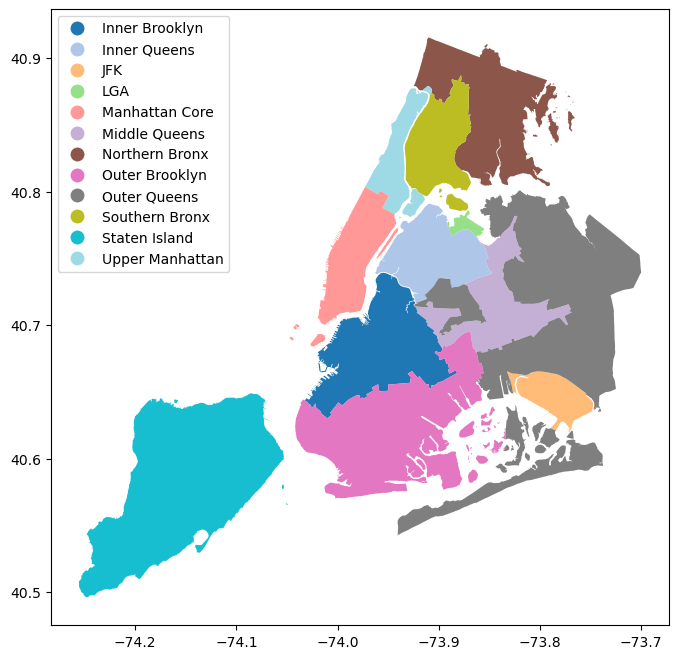

In [ ]:
dzon["geometry"] = dzon["Shape"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(dzon, geometry="geometry", crs="EPSG:4326")
gdf.plot(column="CMS Zone", legend=True, legend_kwds={'loc':'upper left'}, figsize=(8, 8),cmap='tab20')
plt.show()

In [ ]:
gdf_proj = gdf.to_crs(epsg=2263)
gdf_proj['centroid'] = gdf_proj.geometry.centroid

n_zones = 12
distance_matrix = pd.DataFrame(index=gdf_proj['CMS Zone'], columns=gdf_proj['CMS Zone'], dtype=float)

for i in range(n_zones):
    for j in range(n_zones):
        distance_matrix.iloc[i,j] = np.maximum(gdf_proj['centroid'].iloc[i].distance(gdf_proj['centroid'].iloc[j])//1000, 1)

display(distance_matrix)

CMS Zone,Middle Queens,Inner Brooklyn,Northern Bronx,Outer Brooklyn,LGA,Inner Queens,JFK,Outer Queens,Upper Manhattan,Southern Bronx,Manhattan Core,Staten Island
CMS Zone,,,,,,,,,,,,
Middle Queens,1.0,33.0,53.0,43.0,23.0,21.0,29.0,15.0,47.0,46.0,40.0,98.0
Inner Brooklyn,33.0,1.0,72.0,22.0,41.0,29.0,49.0,46.0,52.0,58.0,26.0,65.0
Northern Bronx,53.0,72.0,1.0,91.0,32.0,42.0,80.0,60.0,28.0,16.0,54.0,132.0
Outer Brooklyn,43.0,22.0,91.0,1.0,58.0,48.0,43.0,49.0,73.0,78.0,48.0,60.0
LGA,23.0,41.0,32.0,58.0,1.0,11.0,52.0,34.0,25.0,23.0,31.0,104.0
Inner Queens,21.0,29.0,42.0,48.0,11.0,1.0,50.0,36.0,27.0,29.0,21.0,93.0
JFK,29.0,49.0,80.0,43.0,52.0,50.0,1.0,19.0,77.0,75.0,66.0,104.0
Outer Queens,15.0,46.0,60.0,49.0,34.0,36.0,19.0,1.0,60.0,57.0,55.0,108.0
Upper Manhattan,47.0,52.0,28.0,73.0,25.0,27.0,77.0,60.0,1.0,11.0,29.0,106.0


In [ ]:
zone_nums = list(range(12))
zone_names = {k: v for k, v in enumerate(dzon['CMS Zone'])}

dtrp['o_cms_zone_name'] = dtrp['o_cms_zone'].map(zone_names)
dtrp['d_cms_zone_name'] = dtrp['d_cms_zone'].map(zone_names)

tripzone_d = dtrp.groupby('d_cms_zone_name').size()
tripzone_o = dtrp.groupby('o_cms_zone_name').size()

all_zones = set(zone_names.values())
o_zones_with_data = set(tripzone_o.index)
d_zones_with_data = set(tripzone_d.index)

missing_origins = all_zones - o_zones_with_data
missing_destinations = all_zones - d_zones_with_data

print("Origin zones with no trips:", missing_origins)
print("Destination zones with no trips:", missing_destinations)

tripzone_o = tripzone_o.reindex(all_zones, fill_value=0)
tripzone_d = tripzone_d.reindex(all_zones, fill_value=0)

tripzone = pd.crosstab(dtrp['o_cms_zone_name'], dtrp['d_cms_zone_name'])
tripzone = tripzone.reindex(index=all_zones, columns=all_zones, fill_value=0)

print(f"Number of trips from each origin zone:\n{tripzone_o}\n")
print(f"Number of trips to each destination zone:\n{tripzone_d}\n")

Origin zones with no trips: {'Middle Queens'}
Destination zones with no trips: {'Middle Queens'}
Number of trips from each origin zone:
o_cms_zone_name
Outer Queens        4776
Middle Queens          0
Inner Queens        7223
Southern Bronx      5081
JFK                 4798
LGA                20783
Inner Brooklyn      5127
Northern Bronx      6774
Outer Brooklyn      7462
Staten Island       8072
Upper Manhattan    11395
Manhattan Core      4848
dtype: int64

Number of trips to each destination zone:
d_cms_zone_name
Outer Queens        4750
Middle Queens          0
Inner Queens        7215
Southern Bronx      5050
JFK                 4778
LGA                20903
Inner Brooklyn      5147
Northern Bronx      6743
Outer Brooklyn      7403
Staten Island       8166
Upper Manhattan    11358
Manhattan Core      4826
dtype: int64



## Step II: Forecast the future trip

In [ ]:
np.random.seed(50664004)

future_tripzone_o = {}
future_tripzone_d = {}

for zone in tripzone_o.index:
    future_tripzone_o[zone] = max(0, int(tripzone_o[zone]*(1+np.random.uniform(-0.1, 0.1))))

for zone in tripzone_d.index:
    future_tripzone_d[zone] = max(0, int(tripzone_d[zone]*(1+np.random.uniform(-0.1, 0.1))))

print(f'Future Destination Trips Destribution:\n{future_tripzone_d}')
print(f'Future Origin Trips Destribution:\n{future_tripzone_o}')

Future Destination Trips Destribution:
{'Outer Queens': 4880, 'Middle Queens': 0, 'Inner Queens': 6532, 'Southern Bronx': 4717, 'JFK': 4647, 'LGA': 20615, 'Inner Brooklyn': 5515, 'Northern Bronx': 6331, 'Outer Brooklyn': 7835, 'Staten Island': 7541, 'Upper Manhattan': 10260, 'Manhattan Core': 4769}
Future Origin Trips Destribution:
{'Outer Queens': 5232, 'Middle Queens': 0, 'Inner Queens': 7718, 'Southern Bronx': 5152, 'JFK': 4467, 'LGA': 22295, 'Inner Brooklyn': 5492, 'Northern Bronx': 6789, 'Outer Brooklyn': 7098, 'Staten Island': 8186, 'Upper Manhattan': 10667, 'Manhattan Core': 4793}


In [ ]:
f_origin = np.array(list(future_tripzone_o.values()))
f_dest = np.array(list(future_tripzone_o.values()))

dist = distance_matrix.to_numpy()

# Define a deterrence function based on an exponential decay 
beta_impedance_function = 0.1
def deterrence_function(cij, beta):
    return np.exp(-beta * cij)
deter = deterrence_function(dist, beta_impedance_function)

## Step III: Trips distribution using Gravity Model

In [ ]:
def gravity_model(
    O,  # Origin matrix
    D,  # Destination matrix
    cost_matrix,  # Cost matrix
    deterrence_matrix,  # Deterrence matrix
    error_threshold=0.01,  # Error threshold for stopping condition
    improvement_threshold=1e-4,  # Improvement threshold for stopping condition
):
    # Define a nested function to format and print matrices
    def format_matrix(matrix, matrix_name):
        matrix_size = matrix.shape[0]  # Get the number of rows in the matrix
        # Create column names for the matrix
        column_names = [f"Zone {i}" for i in range(1, matrix_size + 1)]
        # Convert the matrix into a pandas DataFrame for pretty printing
        formatted_matrix = pd.DataFrame(
            matrix, columns=column_names, index=column_names
        )
        # Print the formatted matrix
        print(f"{matrix_name}:\n", formatted_matrix, "\n")

    # Print the initial cost matrix and deterrence matrix
    format_matrix(cost_matrix, "Initial Cost Matrix")
    format_matrix(deterrence_matrix, "Deterrence Matrix")

    # Normalize O and D so their sums are equal
    sum_O = np.sum(O)  # Sum of all elements in O
    sum_D = np.sum(D)  # Sum of all elements in D
    # Adjust O or D if their sums are not equal
    if sum_O != sum_D:
        if sum_O < sum_D:
            correction_ratio = sum_D / sum_O  # Calculate correction ratio
            O = O * correction_ratio  # Adjust O by the correction ratio
        else:
            correction_ratio = sum_O / sum_D  # Calculate correction ratio
            D = D * correction_ratio  # Adjust D by the correction ratio

    n = len(O)  # Number of zones
    T = np.sum(O)  # Total number of trips

    # Initialize balancing factors Ai and Bj
    Ai = np.ones(n)  # Ai balancing factor, initially set to 1 for each zone
    Bj = np.ones(n)  # Bj balancing factor, initially set to 1 for each zone

    previous_error = np.inf  # Initialize previous error to infinity
    iteration_count = 0  # Initialize iteration count
    stop_reason = ""  # Initialize stop reason string

    # Iterative process
    while True:
        iteration_count += 1  # Increment iteration count

        # Update Ai balancing factors
        for i in range(n):
            Ai[i] = 1 / (np.sum(Bj * D * deterrence_matrix[i, :]) + 1e-9)

        # Update Bj balancing factors
        Bj_new = np.ones(n)  # Temporary array for new Bj values
        for j in range(n):
            Bj_new[j] = 1 / (np.sum(Ai * O * deterrence_matrix[:, j]) + 1e-9)

        # Calculate Tij matrix for the model
        Tij = np.outer(Ai * O, Bj_new * D) * deterrence_matrix

        # Calculate the error of the model
        error = (
            np.sum(np.abs(O - np.sum(Tij, axis=1)))
            + np.sum(np.abs(D - np.sum(Tij, axis=0)))
        ) / T

        # Calculate the change in error from the previous iteration
        error_change = abs(previous_error - error)

        # Check stopping conditions
        if error < error_threshold:
            stop_reason = "Error threshold met"  # Set stop reason
            break  # Break the loop if error threshold is met
        elif error_change < improvement_threshold:
            stop_reason = "Slow improvement"  # Set stop reason
            break  # Break the loop if improvement is slow

        previous_error = error  # Update the previous error
        Bj = Bj_new  # Update Bj with new values

    # Format and print the final OD matrix
    final_matrix = pd.DataFrame(
        Tij,
        columns=[f"Zone {i}" for i in range(1, n + 1)],
        index=[f"Zone {i}" for i in range(1, n + 1)],
    )
    final_matrix["Origin"] = final_matrix.sum(axis=1)  # Add sum of rows as Origin
    final_matrix.loc[
        "Destination"
    ] = final_matrix.sum()  # Add sum of columns as Destination

    # Print the final results
    print("Final OD Matrix:")
    print(
        final_matrix.round(3), "\n"
    )  # Print the final OD matrix rounded to 3 decimal places
    print(f"Number of Iterations: {iteration_count}")  # Print the number of iterations
    print(f"Stopping Condition: {stop_reason}")  # Print the stopping condition
    print(
        f"Error: {error*100:.3f}%"
    )  # Print the final error as a percentage with 3 decimal places
    return final_matrix.round(3)

In [ ]:
solution_gravity_model = gravity_model(
    f_origin,  # Origin matrix
    f_dest,  # Destination matrix
    dist,  # Cost matrix
    deter,  # Deterrence matrix
    error_threshold = 0.01,  # Error threshold for stopping condition
    improvement_threshold = 1e-4)  # Improvement threshold for stopping condition

Initial Cost Matrix:
          Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  \
Zone 1      1.0    33.0    53.0    43.0    23.0    21.0    29.0    15.0   
Zone 2     33.0     1.0    72.0    22.0    41.0    29.0    49.0    46.0   
Zone 3     53.0    72.0     1.0    91.0    32.0    42.0    80.0    60.0   
Zone 4     43.0    22.0    91.0     1.0    58.0    48.0    43.0    49.0   
Zone 5     23.0    41.0    32.0    58.0     1.0    11.0    52.0    34.0   
Zone 6     21.0    29.0    42.0    48.0    11.0     1.0    50.0    36.0   
Zone 7     29.0    49.0    80.0    43.0    52.0    50.0     1.0    19.0   
Zone 8     15.0    46.0    60.0    49.0    34.0    36.0    19.0     1.0   
Zone 9     47.0    52.0    28.0    73.0    25.0    27.0    77.0    60.0   
Zone 10    46.0    58.0    16.0    78.0    23.0    29.0    75.0    57.0   
Zone 11    40.0    26.0    54.0    48.0    31.0    21.0    66.0    55.0   
Zone 12    98.0    65.0   132.0    60.0   104.0    93.0   104.0   108.0   

  

## Trip Distribution Results Discussion

    How future distribution is different compared to trip distribution in 2022? Provide at least 1 graph to support your discussion.


In [ ]:
display(solution_gravity_model.sum(), tripzone.sum())


Zone 1      10464.000
Zone 2          0.000
Zone 3      15435.999
Zone 4      10303.999
Zone 5       8934.000
Zone 6      44589.999
Zone 7      10984.001
Zone 8      13578.001
Zone 9      14196.002
Zone 10     16372.000
Zone 11     21334.001
Zone 12      9586.001
Origin     175777.999
dtype: float64

d_cms_zone_name
Outer Queens        4750
Middle Queens          0
Inner Queens        7215
Southern Bronx      5050
JFK                 4778
LGA                20903
Inner Brooklyn      5147
Northern Bronx      6743
Outer Brooklyn      7403
Staten Island       8166
Upper Manhattan    11358
Manhattan Core      4826
dtype: int64

d_cms_zone_name,Outer Queens,Middle Queens,Inner Queens,Southern Bronx,JFK,LGA,Inner Brooklyn,Northern Bronx,Outer Brooklyn,Staten Island,Upper Manhattan,Manhattan Core
o_cms_zone_name,,,,,,,,,,,,
Outer Queens,3199,0,229,73,611,114,28,29,23,368,94,8
Middle Queens,0,0,0,0,0,0,0,0,0,0,0,0
Inner Queens,218,0,5226,26,344,861,14,43,69,190,209,23
Southern Bronx,76,0,30,3787,38,246,1,19,14,108,674,88
JFK,587,0,333,30,3012,427,15,15,17,203,155,4
LGA,136,0,835,239,367,15355,268,408,1329,495,1170,181
Inner Brooklyn,30,0,15,2,15,236,3702,505,231,355,34,2
Northern Bronx,26,0,49,13,15,420,498,5151,351,194,53,4
Outer Brooklyn,15,0,84,6,18,1405,230,336,5041,255,70,2


,Outer Queens,Middle Queens,Inner Queens,Southern Bronx,JFK,LGA,Inner Brooklyn,Northern Bronx,Outer Brooklyn,Staten Island,Upper Manhattan,Manhattan Core
Outer Queens,2755.360,0.0,23.121,43.817,235.006,952.415,195.445,854.426,35.069,40.873,101.915,0.132
Middle Queens,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Inner Queens,21.367,0.0,5891.687,0.507,134.310,163.947,1.675,13.343,329.590,1154.017,35.328,0.006
Southern Bronx,69.030,0.0,0.864,4881.747,11.856,106.937,80.521,47.640,4.352,2.783,76.507,9.833
JFK,213.752,0.0,132.193,6.845,1484.926,1812.590,13.719,89.473,221.588,285.423,175.502,0.051
LGA,860.314,0.0,160.252,61.314,1800.112,16236.151,55.217,241.392,597.827,516.180,1572.048,0.501
Inner Brooklyn,229.995,0.0,2.133,60.146,17.750,71.934,4411.764,786.177,2.397,3.087,10.391,0.099
Northern Bronx,922.576,0.0,15.590,32.651,106.216,288.550,721.364,4704.598,12.977,18.473,30.877,0.066
Outer Brooklyn,31.685,0.0,322.241,2.496,220.116,597.974,1.840,10.859,3991.226,1548.447,350.264,0.068
Staten Island,37.182,0.0,1136.003,1.607,285.467,519.838,2.386,15.564,1559.037,4469.257,151.208,0.026


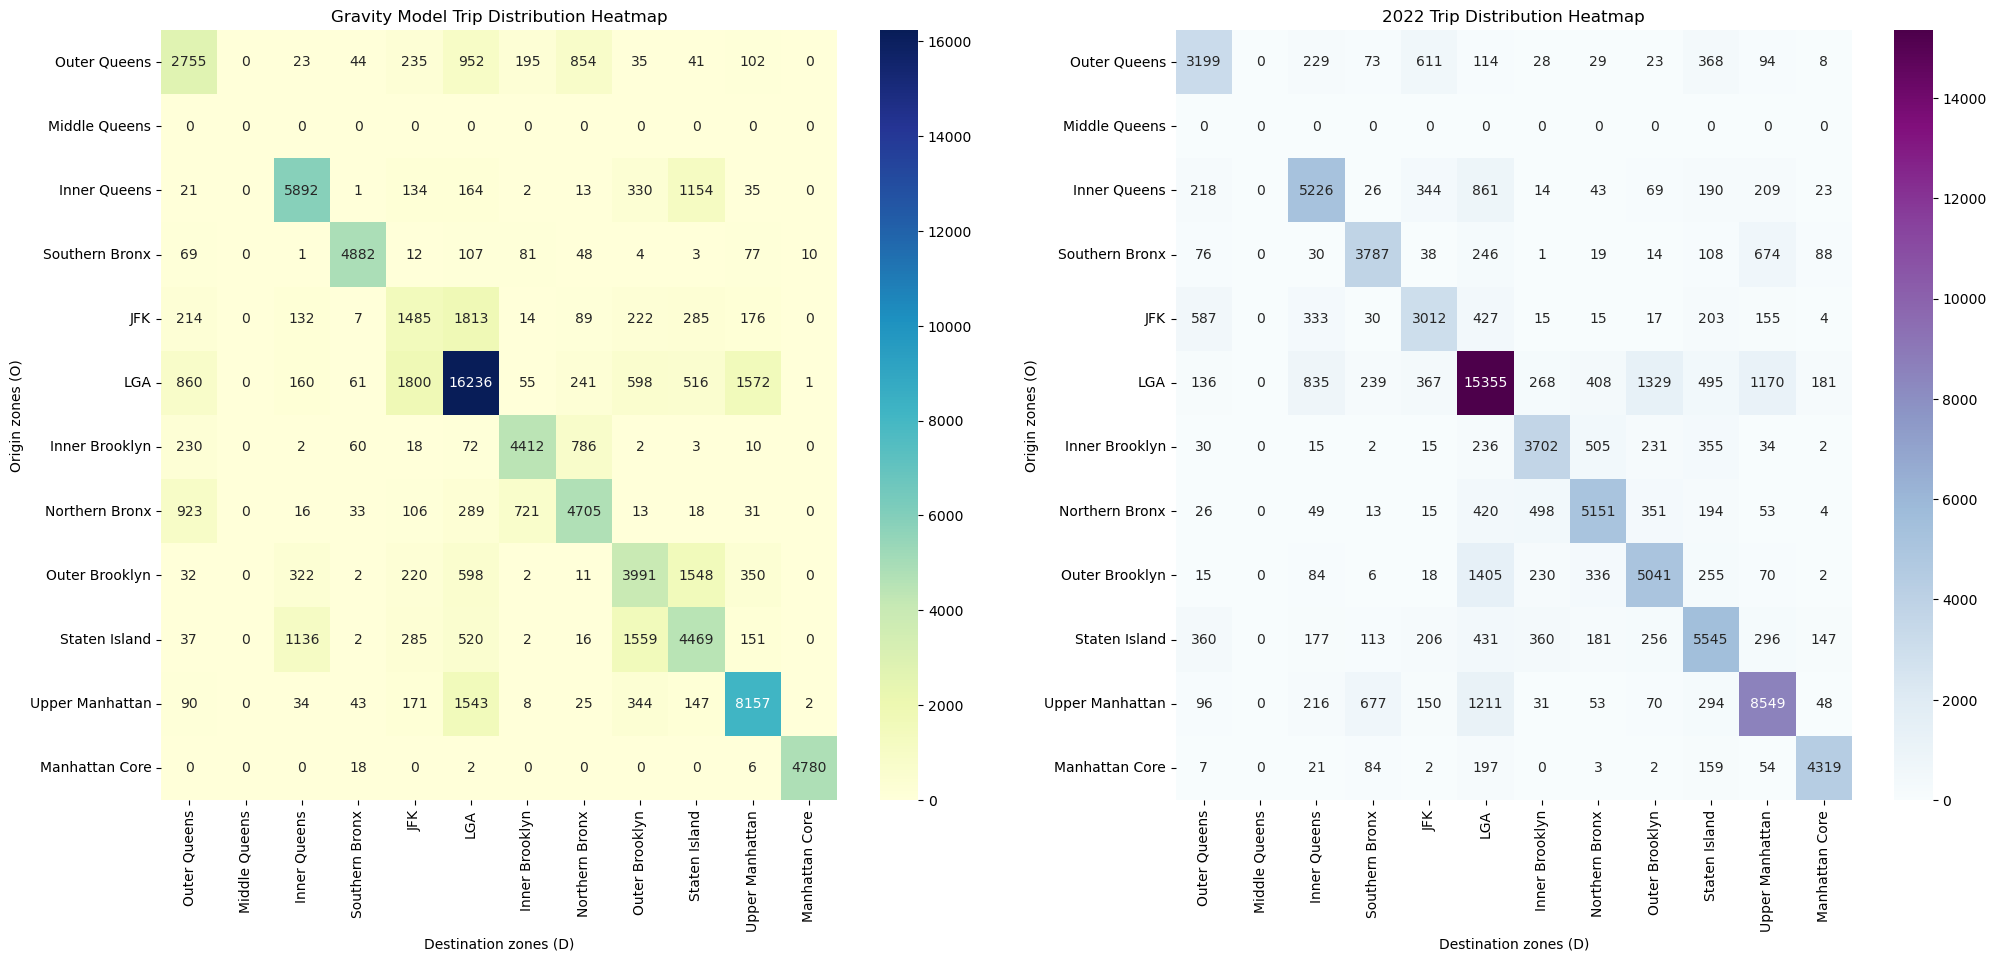

In [ ]:
zone_names_list = tripzone_o.index.tolist()

solution_gravity_model_copy = solution_gravity_model.copy()
solution_gravity_model_copy.drop(columns=['Origin'], inplace=True)
solution_gravity_model_copy.drop(index=['Destination'], inplace=True)

zone_mapping = {f"Zone {i+1}": zone_names_list[i] for i in range(len(zone_names_list))}
solution_gravity_model_renamed = solution_gravity_model_copy.rename(columns=zone_mapping, index=zone_mapping)

solution_gravity_model_renamed

plt.figure(figsize=(24,10))
plt.subplot(1, 2, 1)
sns.heatmap(solution_gravity_model_renamed, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Gravity Model Trip Distribution Heatmap")
plt.xlabel('Destination zones (D)')
plt.ylabel('Origin zones (O)')

display(tripzone, solution_gravity_model_renamed)
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(tripzone, annot=True, fmt="d", cmap="BuPu")
plt.title("2022 Trip Distribution Heatmap")
plt.xlabel('Destination zones (D)')
plt.ylabel('Origin zones (O)')
plt.show()

,Outer Queens,Middle Queens,Inner Queens,Southern Bronx,JFK,LGA,Inner Brooklyn,Northern Bronx,Outer Brooklyn,Staten Island,Upper Manhattan,Manhattan Core
Outer Queens,-443.640,0.0,-205.879,-29.183,-375.994,838.415,167.445,825.426,12.069,-327.127,7.915,-7.868
Middle Queens,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Inner Queens,-196.633,0.0,665.687,-25.493,-209.690,-697.053,-12.325,-29.657,260.590,964.017,-173.672,-22.994
Southern Bronx,-6.970,0.0,-29.136,1094.747,-26.144,-139.063,79.521,28.640,-9.648,-105.217,-597.493,-78.167
JFK,-373.248,0.0,-200.807,-23.155,-1527.074,1385.590,-1.281,74.473,204.588,82.423,20.502,-3.949
LGA,724.314,0.0,-674.748,-177.686,1433.112,881.151,-212.783,-166.608,-731.173,21.180,402.048,-180.499
Inner Brooklyn,199.995,0.0,-12.867,58.146,2.750,-164.066,709.764,281.177,-228.603,-351.913,-23.609,-1.901
Northern Bronx,896.576,0.0,-33.410,19.651,91.216,-131.450,223.364,-446.402,-338.023,-175.527,-22.123,-3.934
Outer Brooklyn,16.685,0.0,238.241,-3.504,202.116,-807.026,-228.160,-325.141,-1049.774,1293.447,280.264,-1.932
Staten Island,-322.818,0.0,959.003,-111.393,79.467,88.838,-357.614,-165.436,1303.037,-1075.743,-144.792,-146.974


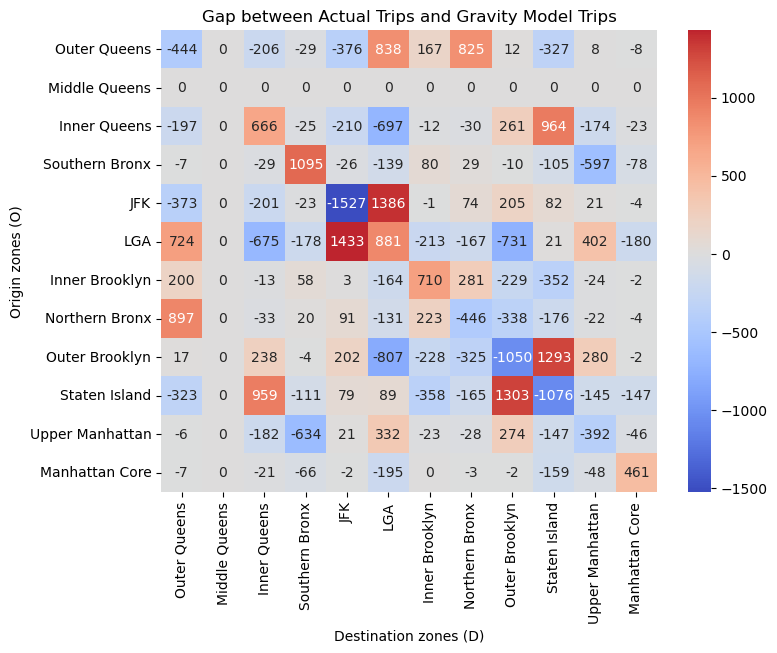

In [ ]:
gap_trips = solution_gravity_model_renamed - tripzone

display(gap_trips)

plt.figure(figsize=(8,6))
sns.heatmap(gap_trips, annot=True, fmt=".0f", cmap="coolwarm", center=0)
plt.title("Gap between Actual Trips and Gravity Model Trips")
plt.xlabel('Destination zones (D)') 
plt.ylabel('Origin zones (O)')
plt.show()

In [ ]:
gap_trips_o = gap_trips.sum()
gap_trips_d = gap_trips.sum(axis=1)
display(gap_trips_o, gap_trips_d)

Outer Queens        482.000
Middle Queens         0.000
Inner Queens        502.999
Southern Bronx      101.999
JFK                -311.000
LGA                1391.999
Inner Brooklyn      345.001
Northern Bronx       46.001
Outer Brooklyn     -304.998
Staten Island        20.000
Upper Manhattan    -690.999
Manhattan Core      -32.999
dtype: float64

Outer Queens        461.579
Middle Queens         0.000
Inner Queens        522.777
Southern Bronx      211.070
JFK                -361.938
LGA                1318.308
Inner Brooklyn      468.873
Northern Bronx       79.938
Outer Brooklyn     -384.784
Staten Island       105.575
Upper Manhattan    -830.138
Manhattan Core      -41.257
dtype: float64

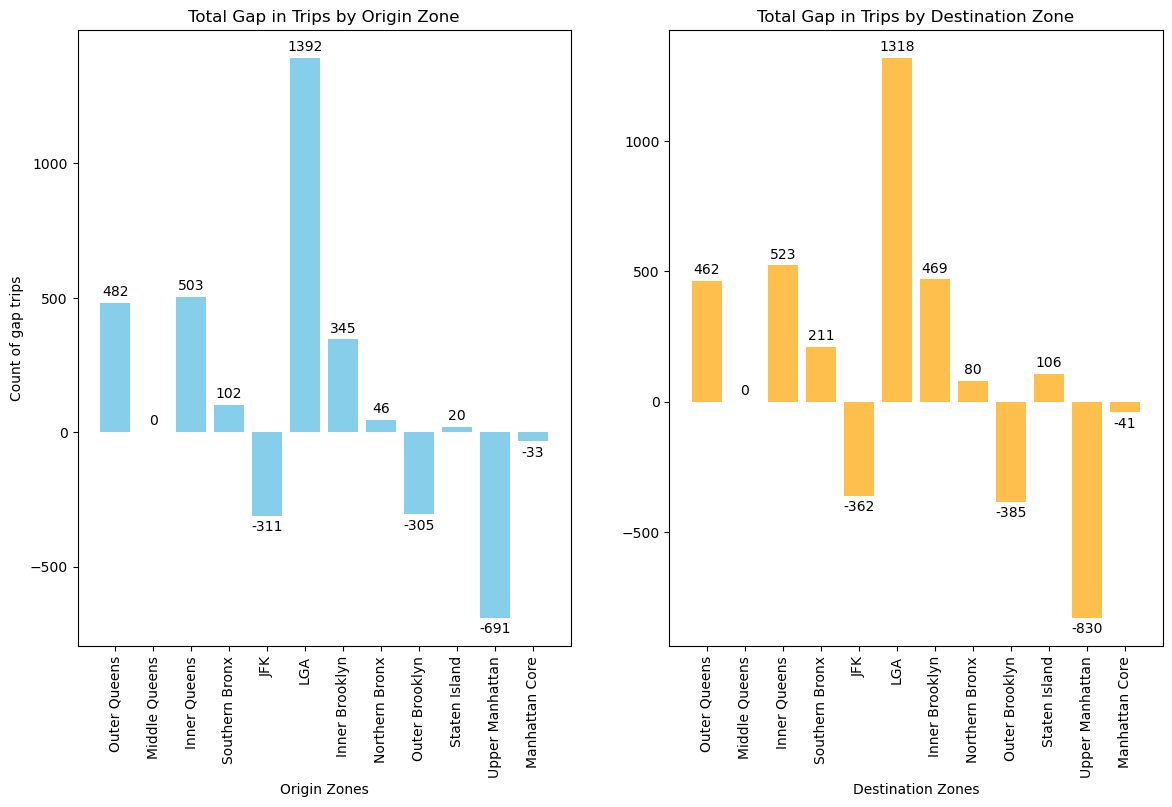

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
o_bar = plt.bar(gap_trips_o.index, gap_trips_o.values, color='skyblue')
plt.bar_label(o_bar,fmt="{:.0f}",padding=3)
plt.title("Total Gap in Trips by Origin Zone")
plt.xlabel('Origin Zones')
plt.ylabel('Count of gap trips')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
o_bar = plt.bar(gap_trips_d.index, gap_trips_d.values, color='orange',alpha=0.7)
plt.bar_label(o_bar,fmt="{:.0f}",padding=3)
plt.title("Total Gap in Trips by Destination Zone")
plt.xlabel('Destination Zones')
plt.xticks(rotation=90)
plt.show()

From the figures above, it is clear that the number of trips estimated using the GM method shows a slight increase compared to the original trips, which depends on the forecasting approach used in Step 2. In terms of trip distribution, the figures show that most travel trips decrease, particularly between the two zones with the longest distances. The concentration of decreases in the two distant zones indicates that travelers are less likely to make long trips in the forecast scenario. Overall, the trip distribution pattern remains similar to the original. These results highlight the importance of carefully selecting forecasting methods, as they can influence the allocation of future trips.

# Part 4: Buid a Mode Choice Model
## Choose Model and Estimated Parameters
    Build a discrete choice models for at least 2 OD pairs for 2022 data.



## Discuss Resulted Model Validity
    Only reasonable models should be included in the report. To increase the likelihood to generate the model with a good fit, use OD-pairs with largest number of predicted trips. 


## Mode Choice Model Results Discussions
    Discuss R-squired, intercept value, signs and significance of estimated parameters. 
    Discuss multiple noticeable observations based on estimated parameters: what unexpected significant factors you have found? Is there a difference in the models for different evaluated OD-pairs? 


# Part 5: New Yorkers’ Commute behavior


# Conclusions
    Discuss your project experience, how you have benefited from the project.

# References

Add your references here if any. 

# Report preparation
The project reports should be prepared and submitted using Jupyter Notebook and it must include all mandatory section and one alternative section. All statements in discussion section should be supported by results, present plots to make your discussion complete. <font color='red'> Supplement your code with proper comments, introduce block of code using markdown cells if necessary, explaining the purpose of the following up code and what the cell output presents, use descriptive names for variables and functions. </font> Your final report should be prepared in a way that is understandable to transportation engineers who does not know how to use Jupyter Notebook and Python code. 
To submit your report, run all cells in the prepared Jupyter Notebook, save it as a pdf and submit to UB BrightSpace. Before submitting, make sure that all output cells, figures, and tables are displayed correctly. Report is due on December 11, 2025, via UB BrightSpace.

